# <center> Cas9 enrichment apple RedFlesh locus + Oxford Nanopore MinION device </center> <br>
🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂🍂


**Author: Elena Lopez-Girona **

Discovery Science project

   - Tracker ID	2030
   - Title	Cloning of gene loci in the absence of a reference genome
   - Project Leader	Elena Lopez-Girona
   - Start date	1-Jul-18
   - End Date	30-Jun-20
   - Funding 2019/20 exc GST	182,200
   - Job Code(s)	P/150008/01 DS2030 CLONING GENE LOCI
   - Portfolio	New Cultivar Innovation
   - **Objective ** in Project Plan Development of a referenceless method to detect structural and epigenetic variants, to fine map genes important to PFR breeding programs. This approach makes use of very long read sequencing Oxford Nanopore technologies and CRISPR-mediated targeted capture of megabase-sized genomic regions.
   
   FIRST MILESTONE: 
   
- Proof of CISMR methology in the red flesh apple
	
- 1.1 Generation of pairs sgRNAs flanking the MYB10 gene designed to capture ~50 k. 1.2 o sgRNA/Cas9 evaluated with synthesised sequences, to establish in vitro digestion and identify efficient sgRNAs to use in genomic sequence capture. 1.3 o A genomic fragment containing the entire gene sequence of the MYB10 gene and its promoter has been isolated.
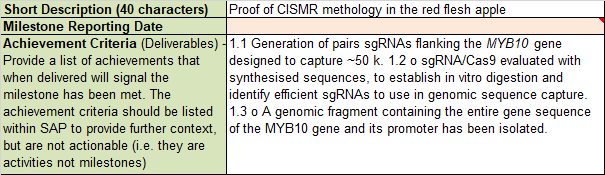


* Run Albacore2 basecalling
* Run pyQC
* Trim with porechop
* Map ON reads to GDv1.1 genome using minimap2
* Produce a Canu assembly and corrected ON reads
* Polish ON raw reads using Nanopolish and a Canu assembly which provides polished vcf files that correct and provide an improved assembly in fasta file




In [1]:
#conda deactivate

In [4]:
module purge
module load conda 

(base) 

: 1

In [5]:
conda activate cflsjt_albacore

(/workspace/appscratch/miniconda/cflsjt_albacore) 

: 1

## Basecall with albacore2

Tried basecalling on the multi-fast5 files from the minION run (done with basecalling set to OFF). This resulted in a fast5 directory with 2 fast5 files which is a multi-fast5 file. Albacore2 is meant to be able to handle this according to some discussions on github but mixed experiences. Will try guppy which apparenyl works on multi-fast5 but for albacore2 need to split these up into single format albacore2 is used to and hope they run!


In [ ]:
multi_to_single_fast5

In [23]:
INDIR1=/input/genomic/plant/Malus/OxfordNanopore/Red_flesh
WKDIR=/workspace/$USER/github/analysis-workflows/Malus/Red_Flesh_ON

In [26]:
mkdir -p $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/single/fasta5/log

In [16]:
multi_to_single_fast5 -i $INDIR1 -s $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/single/fasta5

| 2 of 2|####################################################|100% Time: 0:03:00
(/workspace/appscratch/miniconda/cflsjt_albacore) 

: 1

In [18]:
ls $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/single/fasta5

0  1  filename_mapping.txt  log
(/workspace/appscratch/miniconda/cflsjt_albacore) 

: 1

# Run Albacore2

In [6]:
module load asub/2.1

In [8]:
for i in `seq 0 1`
do
#mkdir -p $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/${i}
echo "read_fast5_basecaller.py -f FLO-MIN106 -k SQK-DCS108 -t 12 -s $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/${i} \
-o $WKDIR/00.Fastq/ -q 100000 -i $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/single/fasta5/${i}"
done | asub -c 50 -j $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/log

Job <192466> is submitted to default queue <normal>.


# pycoQC

In [18]:
mkdir -p $WKDIR/00.Fastq
mkdir -p $WKDIR/01.pycoQC/log

Merge all the summary files from Albacore2 togther

If don't merge then end up with mutiple html files to wade through!

In [27]:
cd $WKDIR/albacore2/Red_flesh_ON_run1_Cas9
for f in `seq 0 1`; do sed '1d' ${f}/sequencing_summary.txt > ${f}_summary.txt; done
head -n 1 0/sequencing_summary.txt > header
cat header *summary.txt > all_summary_run1.txt

(/workspace/appscratch/miniconda/cflsjt_albacore) (/workspace/appscratch/miniconda/cflsjt_albacore) (/workspace/appscratch/miniconda/cflsjt_albacore) (/workspace/appscratch/miniconda/cflsjt_albacore) 

: 1

In [30]:
bsub -o $WKDIR/01.pycoQC/log/QC1.out -e $WKDIR/01.pycoQC/log/QC1.err -J ONT_QC1 "pycoQC -f $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/all_summary_run1.txt -o $WKDIR/01.pycoQC/pycoQC_summary_run1"

Job <777204> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/cflsjt_albacore) 

: 1

# Trim using porechop 

In [31]:
conda deactivate

(base) 

: 1

In [32]:
conda activate cflsjt_porechop

(/workspace/appscratch/miniconda/cflsjt_porechop) 

: 1

In [33]:
module load htslib/1.7

(/workspace/appscratch/miniconda/cflsjt_porechop) 

: 1

In [35]:
mkdir -p $WKDIR/02.poreChop/log

(/workspace/appscratch/miniconda/cflsjt_porechop) 

: 1

* Merge fastq files

* Merge the fastqs from the various sub dirs before chopping

In [39]:
bsub -o $WKDIR/albacore2/merge.out -e $WKDIR/albacore2/merge.err -J merge \
"cat $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/*/workspace/pass/*.fastq | bgzip -c > $WKDIR/albacore2/All_DS_RedFlesh_ON_run1_cas.fastq.gz"


Job <777221> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/cflsjt_porechop) 

: 1

In [40]:
bsub << EOF
#!/bin/bash
#BSUB -J Porechop
#BSUB -o $WKDIR/02.poreChop/log/chop1.out 
#BSUB -e $WKDIR/02.poreChop/log/chop1.err
#BSUB -n 12
#BSUB -R "span[hosts=1]"

porechop -i $WKDIR/albacore2/All_DS_RedFlesh_ON_run1_cas.fastq.gz \
-o $WKDIR/02.poreChop/All_DS_RedFlesh_ON_run1_cas_after_porechop_dis.fastq.gz \
-t 12 --discard_middle

EOF

Job <777235> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/cflsjt_porechop) 

: 1

Trimming adapters from read ends
  * SQK-NSK007_Y_Top: AATGTACTTCGTTCAGTTACGTATTGCTESC
  * SQK-NSK007_Y_Bottom: GCAATACGTAACTGAACGAAGTESC
  * SQK-MAP006_Short_Y_Top_LI32: CGGCGTCTGCTTGGGTGTTTAACCTESC
  * SQK-MAP006_Short_Y_Bottom_LI33: GGTTAAACACCCAAGCAGACGCCGESC
  * 1D2_part_2_start: CTTCGTTCAGTTACGTATTGCTGGCGTCTGCTTESC
  * 1D2_part_2_end: CACCCAAGCAGACGCCAGCAATACGTAACTESC

 Reads 6,106 (100.0%)


* 5,232 / 6,106 reads had adapters trimmed from their start (191,580 bp removed)
* 929 / 6,106 reads had adapters trimmed from their end (13,035 bp removed)


0 / 6,106 reads were discarded based on middle adapters

# Create Metric plots after the filtering (pyQC min read quality 7) and porechop using Nanopack

In [94]:
module purge
module load nanopack/1.0.0

In [95]:
NanoPlot -c darkcyan -f png --title Albacore2 --minqual 7 --N50 -p Albacore2_nanoplot --fastq $WKDIR/02.poreChop/All_DS_RedFlesh_ON_run1_cas_after_porechop_dis.fastq.gz -o $WKDIR/02.poreChop/

# Align Reads to apple GDv1.1 using minimap2

In [1]:
module load minimap2/2.9
module load samtools

In [1]:
FQ=$WKDIR/02.poreChop/All_DS_RedFlesh_ON_run1_cas_after_porechop_dis.fastq.gz
REF=/input/genomic/plant/Malus/Genome/GDDH_v1.1/Decompress/GDDH13_1-1_formatted.fasta 

# Some stats of teh fastq file of reads basecalled by Albacore2 using Nanoplot

In [21]:
cd /software/bioinformatics/nanopack-1.0.0/bin/


In [1]:
module load nanopack/1.0.0

In [3]:
NanoPlot --summary $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/all_summary_run1.txt --loglength -o $WKDIR/albacore2/Red_flesh_ON_run1_Cas9/summary-plots-log-transformed 

In [3]:
mkdir -p $WKDIR/03.minimap2/log 

In [7]:
bsub << EOF
#!/bin/bash
#BSUB -J minimap2
#BSUB -o $WKDIR/03.minimap2/log/map.out 
#BSUB -e $WKDIR/03.minimap2/log/map.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

minimap2 -ax map-ont $REF $FQ | \
samtools view -Su - | samtools sort - -o $WKDIR/03.minimap2/Redflesh.bam

EOF

Job <778154> is submitted to default queue <normal>.


To get the file of unmapped reads do the following, the unmapped file will be in $WKDIR/03.minimap2/log


In [5]:
bsub << EOF
#!/bin/bash
#BSUB -J minimap2
#BSUB -o $WKDIR/03.minimap2/log/unmap.out 
#BSUB -e $WKDIR/03.minimap2/log/unmap.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

minimap2 -2 -a -x map-ont $REF $FQ | \
samtools view -f 4
EOF

Job <175694> is submitted to default queue <normal>.


In [45]:
minimap2

(/workspace/appscratch/miniconda/cflsjt_porechop) Usage: minimap2 [options] <target.fa>|<target.idx> [query.fa] [...]
Options:
  Indexing:
    -H           use homopolymer-compressed k-mer
    -k INT       k-mer size (no larger than 28) [15]
    -w INT       minizer window size [10]
    -I NUM       split index for every ~NUM input bases [4G]
    -d FILE      dump index to FILE []
  Mapping:
    -f FLOAT     filter out top FLOAT fraction of repetitive minimizers [0.0002]
    -g NUM       stop chain enlongation if there are no minimizers in INT-bp [5000]
    -G NUM       max intron length (effective with -xsplice; changing -r) [200k]
    -F NUM       max fragment length (effective with -xsr or in the fragment mode) [800]
    -r NUM       bandwidth used in chaining and DP-based alignment [500]
    -n INT       minimal number of minimizers on a chain [3]
    -m INT       minimal chaining score (matching bases minus log gap penalty) [40]
    -X           skip self and dual mappings (for th

: 1

* Get indexed bam file to be able to load it into IGV
* Coverage summary per Chromosome against Golden Delicious

In [9]:
bsub << EOF
#!/bin/bash
#BSUB -J minimap2
#BSUB -o $WKDIR/03.minimap2/log/index_depth.out 
#BSUB -e $WKDIR/03.minimap2/log/index_depth.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"

samtools index $WKDIR/03.minimap2/Redflesh.bam
samtools depth $WKDIR/03.minimap2/Redflesh.bam > $WKDIR/03.minimap2/Redflesh.coverage
EOF

Job <778156> is submitted to default queue <normal>.


Select coverage for a each chromosome higher than 20 and just count how many bp have depth of 20 or more. So those are the regions that have been sequenced despite the target at chromosome 9 (red Flesh locus)

In [ ]:
for i in Chr01 Chr02 Chr03 Chr04 Chr05 Chr06 Chr07 Chr08 Chr09 Chr10 Chr11 Chr12 Chr13 Chr14 Chr15 Chr16 Chr17
do
awk '{if(($3>20)&&($1=="'$i'")) print$1}' Redflesh.coverage | wc -l 
done


https://www.biostars.org/p/245652/

Select coverage for a each chromosome higher than 50 and just count how many bp have depth of 50 or more. So those are the regions that have been sequenced despite the target at chromosome 9 (red Flesh locus, just Chr16 with coverage higher than 50 despite targeted region in Chr09.

In [ ]:
for i in Chr01 Chr02 Chr03 Chr04 Chr05 Chr06 Chr07 Chr08 Chr09 Chr10 Chr11 Chr12 Chr13 Chr14 Chr15 Chr16 Chr17
do
awk '{if(($3>50)&&($1=="'$i'")) print$0}' $WKDIR/03.minimap2/Redflesh.coverage | grep -v "Chr09" | grep -v 'Chr16'
done

Generate coverage files per chromosome 

In [21]:
bsub << EOF
#!/bin/bash
#BSUB -J coverage_per_chr
#BSUB -o $WKDIR/03.minimap2/log/depth_per_chr.out 
#BSUB -e $WKDIR/03.minimap2/log/depth_per_chr.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"


for i in Chr01 Chr02 Chr03 Chr04 Chr05 Chr06 Chr07 Chr08 Chr09 Chr10 Chr11 Chr12 Chr13 Chr14 Chr15 Chr16 Chr17
do
awk '{if(($3>=0)&&($1=="'$i'")) print $0}' $WKDIR/03.minimap2/Redflesh.coverage > $WKDIR/03.minimap2/$i'_RedFlesh.coverage'
done 

EOF

Job <780464> is submitted to default queue <normal>.


To plot the data in R this coverage file needs to be imported and the headers need to be added

* I used the following R script to plot density plots per chromosome:
* Density_plot_mapped_ON_reads_RedFlesh_to_GD_minimap2.R I run it directly in command line to be able to run Bioconductor, not in RStudio

In [17]:
module load bedtools/2.27.1

Calculate lenghts Apple chromosomes to prepare bed file as input to say which region to look for coverage: whole chromosomes

In [8]:
cat $REF | awk '$0 ~ ">" {print c; c=0;printf substr($0,2,100) "\t"; } $0 !~ ">" {c+=length($0);} END { print c; }'



Chr11	43059885
Chr10	41762413
Chr13	44339518
Chr12	33050054
Chr15	54945402
Chr14	32513452
Chr17	34748701
Chr16	41389449
Chr01	32625452
Chr00	52728359
Chr03	37524076
Chr02	37577729
Chr05	47952461
Chr04	32301874
Chr07	36691129
Chr06	37137259
Chr09	37604908
Chr08	31609270
(base) 

: 1

In [21]:
cd $WKDIR/03.minimap2/
head GD.bed

Chr00	1	52728359	region	0	+
Chr01	1	32625452	region	0	+
Chr02	1	37577729	region	0	+
Chr03	1	37524076	region	0	+
Chr04	1	32301874	region	0	+
Chr05	1	47952461	region	0	+
Chr06	1	37137259	region	0	+
Chr07	1	36691129	region	0	+
Chr08	1	31609270	region	0	+
Chr09	1	37604908	region	0	+


In [18]:
bedtools coverage -a $WKDIR/03.minimap2/GD.bed -b $WKDIR/03.minimap2/Redflesh.bam -bed -nonamecheck

Chr00	1	52728359	region	0	+	2821	8511089	52728358	0.1614139
Chr01	1	32625452	region	0	+	1313	5023072	32625451	0.1539618
Chr02	1	37577729	region	0	+	1378	4974132	37577728	0.1323691
Chr03	1	37524076	region	0	+	1567	6163109	37524075	0.1642441
Chr04	1	32301874	region	0	+	1307	5074542	32301873	0.1570975
Chr05	1	47952461	region	0	+	1693	6782496	47952460	0.1414421
Chr06	1	37137259	region	0	+	1305	5265597	37137258	0.1417875
Chr07	1	36691129	region	0	+	1368	5640447	36691128	0.1537278
Chr08	1	31609270	region	0	+	1351	5434468	31609269	0.1719264
Chr09	1	37604908	region	0	+	1709	6177718	37604907	0.1642796
Chr10	1	41762413	region	0	+	1633	6819343	41762412	0.1632890
Chr11	1	43059885	region	0	+	1886	6846034	43059884	0.1589887
Chr12	1	33050054	region	0	+	1164	5031214	33050053	0.1522301
Chr13	1	44339518	region	0	+	1843	6932622	44339517	0.1563531
Chr14	1	32513452	region	0	+	1150	4380015	32513451	0.1347139
Chr15	1	54945402	region	0	+	2217	8852879	54945401	0.1611214
Chr16	1	41389449	region	0	+	1984	6914874

In [19]:
bsub << EOF
#!/bin/bash
#BSUB -J coverage_per_chr
#BSUB -o $WKDIR/03.minimap2/log/cov_per_chr.out 
#BSUB -e $WKDIR/03.minimap2/log/cov_per_chr.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"

bedtools coverage -a $WKDIR/03.minimap2/GD.bed -b $WKDIR/03.minimap2/Redflesh.bam -bed -nonamecheck -d -s | gzip > $WKDIR/03.minimap2/Redflesh_all_chromosomes_perbasepair.tsv.gz

EOF

Job <780558> is submitted to default queue <normal>.


calculate the coverage per base pair in this region

In [20]:
bsub << EOF
#!/bin/bash
#BSUB -J coverage_per_chr_2
#BSUB -o $WKDIR/03.minimap2/log/cov_other_strand_per_chr.out 
#BSUB -e $WKDIR/03.minimap2/log/cov_other_strand_per_chr.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"w
#on the opposite strand
bedtools coverage -a $WKDIR/03.minimap2/GD.bed -b $WKDIR/03.minimap2/Redflesh.bam -bed -d -nonamecheck -S | gzip > $WKDIR/03.minimap2/Redflesh_all_chromosomes_perbasepair_other_strand.tsv.gz
EOF

Job <780559> is submitted to default queue <normal>.


In [ ]:
gunzip -c $WKDIR/03.minimap2/Redflesh_all_chromosomes_perbasepair.tsv.gz | grep "Ch17"

In [43]:
for j in Chr01 Chr02 Chr03 Chr04 Chr05 Chr06 Chr07 Chr08 Chr09 Chr10 Chr11 Chr12 Chr13 Chr14 Chr15 Chr16 Chr17
do
gzip -dc $WKDIR/03.minimap2/Redflesh_all_chromosomes_perbasepair.tsv.gz | awk '{if($1=="'$j'") print$0}' > $WKDIR/03.minimap2/Redflesh_all_chromosomes_perbasepair_$j.tsv
done
EOF

Job <780578> is submitted to default queue <normal>.


Now to load the data into R.

In [41]:
for d in Chr01 Chr02 Chr03 Chr04 Chr05 Chr06 Chr07 Chr08 Chr09 Chr10 Chr11 Chr12 Chr13 Chr14 Chr15 Chr16 Chr17
do
gzip -dc $WKDIR/03.minimap2/Redflesh_all_chromosomes_perbasepair_other_strand.tsv.gz | awk '{if($1=="'$d'") print$0}' > $WKDIR/03.minimap2/Redflesh_all_chromosomes_perbasepair_other_starnd_$d.tsv
done

EOF

Job <780576> is submitted to default queue <normal>.


# Coverage plots done by R script on R command line 


* The script  and plots are saved: at $WKDIR/03.minimap2/Coverage_plots_bedtools


* Density plots generated from bamtools depth files are saved on: Density_plots_bamtools_depth

## Canu to be used to assemble MiniON targeted sequencing reads 

Comments on using Canu with targeted requencing reads coming from Pacbio 
* https://github.com/marbl/canu/issues/476

* Set genomeSize to your best guess of the combined size of the regions. You can probably be too high by an order of magnitude with no real problem; but too low would be somewhat bad. This impacts how corrected reads are computed, and how many corrected reads are computed.

* Once you get a feel for how they assemble, correctedErrorRate can be varied to refine how much assembly is done.

* Check the GFA outputs. If they're showing a big tangle, try dropping correctedErrorRate a bit. If unitigs look a lot like contigs, you've got a clean trusted assembly (and if they're big too, well, excellent).

In [4]:
mkdir -p $WKDIR/04.canu/

In [6]:
mkdir -p $WKDIR/04.canu/logs

In [13]:
bsub << EOF
#!/bin/bash
#BSUB -J Canu
#BSUB -o $WKDIR/04.canu/logs/canu.out 
#BSUB -e $WKDIR/04.canu/logs/canu.err
#BSUB -n 8
#BSUB -R "span[hosts=1]"w

module load canu/1.7
canu -p Redflesh_Chr09_canu -d $WKDIR/04.canu genomeSize=200k -nanopore-raw $FQ 
module unload canu/1.7


EOF

Job <792977> is submitted to default queue <normal>.


** Re do the previous to get the report file in another file without disturbing what I did already **

In [19]:
bsub << EOF
#!/bin/bash
#BSUB -J Canu
#BSUB -o $WKDIR/04.canu/new/canu.out 
#BSUB -e $WKDIR/04.canu/new/canu.err
#BSUB -n 20
#BSUB -R "span[hosts=1]"w

module load canu/1.7
thread=20
#mkdir -p $WKDIR/04.canu/new
canu -p Redflesh_Chr09_canu -d $WKDIR/04.canu/new useGrid=0 genomeSize=200k maxThreads=$thread -nanopore-raw $FQ 
#module unload canu/1.7


EOF

Job <39266> is submitted to default queue <normal>.


*  -p option is to set the file name prefix of intermediate and output files, is mandatory. If -d is not supplied, canu will run in the current directory. Otherwise, Canu will create the assembly-directory and run in that directory.It is _not_ possible to run two different assemblies in the same directory.


*  For the genomeSize I estimated teh value for the total of the target region plus the rest of the regions that got sequenced and doubling that just to not be so low or understimating the size of amplicons that got sequenced here. 


*  The -s option will import a list of parameters from the supplied specification (‘spec’) file. These options can be useful if you want to correct reads once and try many different assemblies. We do exactly that in the Canu Quick Start. Additionally, suppling pre-corrected reads with -pacbio-corrected or -nanopore-corrected will run only the trimming (-trim) and assembling (-assemble) stages.


*  Additional parameters of canu https://canu.readthedocs.io/en/latest/parameter-reference.html#parameter-reference



In [15]:
cd  $WKDIR/04.canu/
head Redflesh_Chr09_canu.contigs.fasta


>tig00000001 len=130229 reads=87 covStat=351.14 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
GTATAAGAAGTTTTCTCCTCGTACGGCTCGAGAAAATTCTAAATTATGTCTATGTATAGAATCATAATATCAAATAGATCCATAAAATCATCAAATTCAT
TATATTATTGATTTTAGTTTAAATACTTTTTCTTAGTCTCCCCAAAAAAAATTATTTGTATCCTCATAACTCAAGTTGAATAACTCTCAAATAACTCAAA
AGAAACCTTTTAGGTATTAAATTTATTAGTGGTCTCTAACCCTTTTTGTCTGTCTCCTTTAGAATCTATTTTGATTCTTAAATATGATCTGGTTGTTGAG
ACAATTGAAAACGGTATTTCCTTGTTCCAGGATCTTTATCTTTGCCTTGAATCATTGGGTTTAGACATTACTTCGGTGATCTTTAAATCGTTTCAAAACG
GCAGCAACATACCATTTTTGTGATTTCTTTCTATCAAAGAATCGTATGAATGGTTGATTCCTACGTAATACACTTTACTTTTGATTTGATCAAAGAGTTT
TACCAATTCAACAAAATTAACTTTTAAATTTTATCGAATTGGATCCTTTAGATTTATATATCTAAAATAGACTTACGAAGTTGTTCCAATTTATTGATCG
ATACTAACCTTAGATTCTTGCCCTTGAGAAATTAATCAATACGTTCTACTCGAGCTCCATCGTGTACTATTTACATGGCAACACTCTCAAAAATGAGGGT
TCCAGTGGAACAGAACAAATGATGTCGAGCCAAGAGCACTTTCGTTCCTATATAATATAAAAAGTGGTGGATGTAAGAATCCACAGCTGATCATGTCCTT
CAAGTCGCACGTTGCTTTCTGCCACATCGTTTTAAACGAAGTTTTACCATAACATTCCTTCAGTTTGGAACCAGTATGTA

Make index to the assembly fasta file (.fai)

In [11]:
samtools faidx $WKDIR/04.canu/Redflesh_Chr09_canu.contigs.fasta

In [16]:
grep ">" Redflesh_Chr09_canu.contigs.fasta
#Just 7 contigs got assembled the last two are crap tough..


>tig00000001 len=130229 reads=87 covStat=351.14 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000003 len=17146 reads=118 covStat=-47.97 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000015 len=14585 reads=13 covStat=37.92 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000017 len=16132 reads=15 covStat=13.60 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000018 len=8006 reads=118 covStat=-75.37 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000383 len=7197 reads=1 covStat=0.00 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000384 len=7927 reads=45 covStat=-6.89 gappedBases=no class=contig suggestRepeat=no suggestCircular=no


In [17]:
grep ">" Redflesh_Chr09_canu.unassembled.fasta | wc -l 


329


In [13]:
grep ">"  $WKDIR/04.canu/Redflesh_Chr09_canu.unassembled.fasta | wc -l 

329


Now it will be very informative to know where these scaffolds locate on GD genome and of course if our targeted ROI at Chr09 it contains a different structural variant than GD or something similar, etc.. And see where the other contigs locate and compare the lenght of contigs with what get aligned with GD and see if something is similar and containing any color related sequence...

# Nucmer

In [19]:
mkdir -p $WKDIR/04.canu/nucmer
mkdir -p $WKDIR/04.canu/nucmer/logs

In [61]:
bsub << EOF
#!/bin/bash
#BSUB -J Nucmer
#BSUB -o $WKDIR/04.canu/nucmer/logs/nucmer.out 
#BSUB -e $WKDIR/04.canu/nucmer/logs/nucmer.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"w

export GDFONTPATH=/usr/share/fonts/msttcore/


#/software/bioinformatics/MUMmer-3.23/nucmer -c 65 -l 65 --maxmatch -p $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1 -o $REF $WKDIR/04.canu/Redflesh_Chr09_canu.contigs.fasta

#Then I filter the delta file for several similarity ranges
#/software/bioinformatics/MUMmer-3.23/delta-filter -l 1000 -q -r -i 80 -1 $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1.delta > $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta

# Now ploting the contig in the y axis to see hpw the contig was put together and identify chimeric contigs

#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000001 -p $WKDIR/04.canu/nucmer/tig00000001_vs_Red_ON_contigs_i80 $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000003 -p $WKDIR/04.canu/nucmer/tig00000003_vs_Red_ON_contigs_i80 $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000015 -p $WKDIR/04.canu/nucmer/tig00000015_vs_Red_ON_contigs_i80 $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000017 -p $WKDIR/04.canu/nucmer/tig00000017_vs_Red_ON_contigs_i80 $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta

#The tig00000018 is the Redflesh locus that we enriched, seing this plot it is clear!
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000018 -p $WKDIR/04.canu/nucmer/tig00000018_vs_Red_ON_contigs_i80 $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta

# Same plots than the last previous ones but with delta file before filtering by identity 80

#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000001 -p $WKDIR/04.canu/nucmer/tig00000001_vs_Red_ON_contigs $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1.delta
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000003 -p $WKDIR/04.canu/nucmer/tig00000003_vs_Red_ON_contigs $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1.delta
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000015 -p $WKDIR/04.canu/nucmer/tig00000015_vs_Red_ON_contigs $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1.delta
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000017 -p $WKDIR/04.canu/nucmer/tig00000017_vs_Red_ON_contigs $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1.delta

#The tig00000018 is the Redflesh locus that we enriched, seing this plot it is clear!
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000018 -p $WKDIR/04.canu/nucmer/tig00000018_vs_Red_ON_contigs $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1.delta

# no plot generate for this one cos not present in delta file _ not even in delta file before filtered
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000383 -p $WKDIR/04.canu/nucmer/tig00000383_vs_Red_ON_contigs_i80 $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta
#/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -q tig00000384 -p $WKDIR/04.canu/nucmer/tig00000384_vs_Red_ON_contigs_i80 $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta

EOF

Job <793480> is submitted to default queue <normal>.


In [ ]:
#Plot the results of compering the canu assembly to GD1.1 Chromosomes
for j in `seq 1 9`
do
/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -r 'Chr0'$j -p $WKDIR/04.canu/nucmer/Chr$j'_vs_Red_ON_contigs_all' $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1.delta
/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -r 'Chr0'$j -p $WKDIR/04.canu/nucmer/Chr$j'_vs_Red_ON_contigs_i80' $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta
done

In [ ]:
#Plot the results of compering the canu assembly to GD1.1 Chromosomes
for j in `seq 11 17`
do
/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -r 'Chr'$j -p $WKDIR/04.canu/nucmer/Chr$j'_vs_Red_ON_contigs_all' $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1.delta
/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s large -r 'Chr'$j -p $WKDIR/04.canu/nucmer/Chr$j'_vs_Red_ON_contigs_i80' $WKDIR/04.canu/nucmer/RedfleshON_assembled_contigs_vs_GD1.1_i80.delta
done

I had a look the coordinates on tig00000018 against the GD refe genome to see the gap that is different, that it will be the
repeat (R6) which is just presen in red fleshed apples

In [9]:
cd $WKDIR/04.canu/nucmer
grep "tig00000018" RedfleshON_assembled_contigs_vs_GD1.1.coords

35542718 35544729  |        2     1988  |     2012     1987  |    97.91  | Chr09	tig00000018
35544749 35550692  |     2109     8006  |     5944     5898  |    97.43  | Chr09	tig00000018


* All the white-fleshed varieties tested contained only the
* R1 version, while the red-fleshed apple varieties contained both
* R1 and R6, or R6 only (from Espley et al.,2009)

## Map the generated contigs by Canu to the GD reference genome

In [71]:
Canu_assembled_contigs=$WKDIR/04.canu/Redflesh_Chr09_canu.contigs.fasta

In [72]:
mkdir -p $WKDIR/04.canu/minimap
mkdir -p $WKDIR/04.canu/minimap/logs

In [81]:
module load samtools

In [ ]:
module load minimap2/2.9

In [79]:
bsub << EOF
#!/bin/bash
#BSUB -J minimap2
#BSUB -o $WKDIR/04.canu/minimap/logs/map.out 
#BSUB -e $WKDIR/04.canu/minimap/logs/map.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

#minimap2 -ax map-ont $REF $Canu_assembled_contigs | \
#samtools view -Su - | samtools sort - -o $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam  
#samtools index $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam
samtools depth $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam > $WKDIR/04.canu/minimap/Canu_assembled_contigs.coverage
EOF

Job <793487> is submitted to default queue <normal>.


## Identify the regions on GDv1.1 that got mapped contigs (from canu assembly) and see the lenght of those regions. Here major than 6000bp 


In [53]:
samtools view -F 260 $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam | awk '{if(length($10)>=1000) print$1,$2,$3,$4,$5,length($10)}' | grep "tig00000003" 

: 1

In [65]:
samtools view -F 260 $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam | awk '$5>=1 {print$0}' | grep "tig00000003" | awk '{if(length($10)>=1000) print$1,$2,$3,$4,$5,length($10)}'

tig00000003 0 Chr01 8318206 1 17146


In [74]:
samtools view -F 260 $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam | awk '$5>=60 {print$0}' | grep "tig00000001" | awk '{if(length($10)>=5000) print$1,$2,$3,$4,$5,length($10)}'

tig00000001 2048 Chr11 41324068 60 6189
tig00000001 2064 Chr11 41342576 60 5655
tig00000001 2048 Chr16 19839842 60 9270
tig00000001 0 Chr03 32262521 60 130229


In [77]:
samtools view -F 260 $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam | awk '$5>=1 {print$0}' | grep "tig00000015" | awk '{if(length($10)>=5000) print$1,$2,$3,$4,$5,length($10)}'

tig00000015 16 Chr03 14635886 1 14585
tig00000015 2048 Chr03 25294985 1 6925


In [79]:
samtools view -F 260 $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam | awk '$5>=2 {print$0}' | grep "tig00000017" | awk '{if(length($10)>=5000) print$1,$2,$3,$4,$5,length($10)}'

tig00000017 2064 Chr13 38073157 17 8769
tig00000017 16 Chr00 44188223 6 16132


In [81]:
samtools view -F 260 $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam | awk '$5>=1 {print$0}' | grep "tig00000383" | awk '{if(length($10)>=5000) print$1,$2,$3,$4,$5,length($10)}'

tig00000383 0 Chr10 39102468 1 7197


In [82]:
samtools view -F 260 $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam | awk '$5>=1 {print$0}' | grep "tig00000384" | awk '{if(length($10)>=5000) print$1,$2,$3,$4,$5,length($10)}'

tig00000384 0 Chr08 28998157 1 7927


In [83]:
samtools view -F 260 $WKDIR/04.canu/minimap/Canu_assembled_contigs.bam | awk '$5>=60 {print$0}' | grep "tig00000018" | awk '{if(length($10)>=5000) print$1,$2,$3,$4,$5,length($10)}'

tig00000018 0 Chr09 35542718 60 8006


## Alignment of Corrected reads from Canu to GDv1.1 reference genome 

In [1]:
mkdir $WKDIR/04.canu/minimap/correct_reads_to_GD
mkdir $WKDIR/04.canu/minimap/correct_reads_to_GD/logs/

REF=/input/genomic/plant/Malus/Genome/GDDH_v1.1/Decompress/GDDH13_1-1_formatted.fasta 
canu_corrected=$WKDIR/04.canu/Redflesh_Chr09_canu.correctedReads.fasta.gz

module load minimap2/2.9
module load samtools

mkdir: cannot create directory ‘/04.canu/minimap/correct_reads_to_GD’: No such file or directory
mkdir: cannot create directory ‘/04.canu/minimap/correct_reads_to_GD/logs/’: No such file or directory


In [113]:
bsub << EOF
#!/bin/bash
#BSUB -J minimap_corrected_canu_to_GD
#BSUB -o $WKDIR/04.canu/minimap/correct_reads_to_GD/logs/corr_vs_GD.out 
#BSUB -e $WKDIR/04.canu/minimap/correct_reads_to_GD/logs/corr_vs_GD.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"
module load minimap2/2.9
module load samtools
cd $WKDIR/04.canu/minimap/correct_reads_to_GD
#minimap2 -ax map-ont $REF $canu_corrected | \
#samtools view -Su - | samtools sort - -o $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam  
#samtools index $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam
#samtools depth $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam > $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.coverage

samtools view -H canu_corrected_vs_GDv1.1.bam > test_canu_corrected_vs_GDv1.1.sam  #print header
samtools view -F 260 canu_corrected_vs_GDv1.1.bam | awk '$5>=40 {print$0}' >> test_canu_corrected_vs_GDv1.1.sam #select just those mapped reads with MQ>=40
samtools view -S -b -h test_canu_corrected_vs_GDv1.1.sam > test_canu_corrected_vs_GDv1.1.bam #convert to bam
samtools depth test_canu_corrected_vs_GDv1.1.bam > test_canu_corrected_vs_GDv1.1.cov #compute coverage per bp


EOF

Job <376292> is submitted to default queue <normal>.


In [ ]:
grep "Chr17" test_canu_corrected_vs_GDv1.1.cov | awk '{if($3>=25) print$0}' | head


# Count only mapped reads(primary aligned) reads 
* options
*  -c  count reads and print the total number
*  -f bitcode  output reads that fulfill the checked 'bitcode' criteria, see SAM bitcode fields
*  -F bitcode  exclude reads that match one or more checked 'bitcode' criteria, see SAM bitcode fields
*  -F 260  output primary aligned mapped reads
*                        read unmapped & not primary alignment criteria 3 & 9 are selected for exclusion
*                       bit 3 + bit 9 = 4 + 256 = 260

In [11]:
module load samtools/1.9

In [6]:
samtools view -F 0x904 $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam | wc -l 

777


In [17]:
samtools stats $WKDIR/03.minimap2/Redflesh.bam | grep 'SN' 

# Summary Numbers. Use `grep ^SN | cut -f 2-` to extract this part.
SN	raw total sequences:	6106
SN	filtered sequences:	0
SN	sequences:	6106
SN	is sorted:	1
SN	1st fragments:	6106
SN	last fragments:	0
SN	reads mapped:	6022
SN	reads mapped and paired:	0	# paired-end technology bit set + both mates mapped
SN	reads unmapped:	84
SN	reads properly paired:	0	# proper-pair bit set
SN	reads paired:	0	# paired-end technology bit set
SN	reads duplicated:	0	# PCR or optical duplicate bit set
SN	reads MQ0:	22	# mapped and MQ=0
SN	reads QC failed:	0
SN	non-primary alignments:	10007
SN	total length:	106571236	# ignores clipping
SN	total first fragment length:	106571236	# ignores clipping
SN	total last fragment length:	0	# ignores clipping
SN	bases mapped:	106289610	# ignores clipping
SN	bases mapped (cigar):	103022198	# more accurate
SN	bases trimmed:	0
SN	bases duplicated:	0
SN	mismatches:	22796575	# from NM fields
SN	error rate:	2.212783e-01	# mismatches / bases mapped (cigar)
SN	average length:	1

In [ ]:
samtools stats $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam | grep "SN'

In [6]:
samtools view -c -F 260 $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam "Chr09:35542701-35551900"

133


In [13]:
samtools view -c $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam "Chr09:35542701-35551900" 

133


In [9]:
samtools view -c -F 260 $WKDIR/03.minimap2/Redflesh.bam "Chr09:35542701-35551878"  #before canu corrected

180


In [7]:
samtools view -c -F 0x904 $WKDIR/03.minimap2/Redflesh.bam "Chr09:35542701-35551900"  #before canu corrected

180


In [22]:
samtools view -c -F 260 $WKDIR/03.minimap2/Redflesh.bam 

18958


In [8]:
samtools view -c -F 0x904 $WKDIR/03.minimap2/Redflesh.bam 

6022


In [18]:
samtools view -c -f 0x10 $WKDIR/03.minimap2/Redflesh.bam "Chr09:35542701-35551900"  #before canu corrected albacore2 ones reverse

73


In [19]:
samtools view -c -F 0x10 $WKDIR/03.minimap2/Redflesh.bam "Chr09:35542701-35551900"  #before canu corrected Forward

107


In [5]:
samtools view -c $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam #total that maybe unmapped and duplicated-multialigned reads)

6945


In [14]:
samtools view -f 0x10 $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam "Chr09:35542701-35551878" | wc -l #(on target reverse)

62


In [15]:
samtools view -F 0x10 $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam "Chr09:35542701-35551878" | wc -l #(on target forward)

71


In [6]:
bsub << EOF
#!/bin/bash
#BSUB -J minimap_corrected_canu_to_GD
#BSUB -o $WKDIR/04.canu/minimap/correct_reads_to_GD/logs/corr_vs_GD.out 
#BSUB -e $WKDIR/04.canu/minimap/correct_reads_to_GD/logs/corr_vs_GD.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools 
/workspace/hrarnc/GitHub/minimap2/minimap2 -cx asm5 $REF $canu_corrected | \
samtools view -Su - | samtools sort - -o $WKDIR/04.canu/minimap/correct_reads_to_GD/ASM05canu_corrected_vs_GDv1.1.bam  
samtools index $WKDIR/04.canu/minimap/correct_reads_to_GD/ASM05canu_corrected_vs_GDv1.1.bam
samtools depth $WKDIR/04.canu/minimap/correct_reads_to_GD/ASM05canu_corrected_vs_GDv1.1.bam > $WKDIR/04.canu/minimap/correct_reads_to_GD/ASM05canu_corrected_vs_GDv1.1.coverage
EOF

Job <11911> is submitted to default queue <normal>.


In [115]:
samtools view $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam | awk '{if(length($10)>=6000) print$1,$2,$3,$4,$5,length($10)}'| grep "Chr09" | sort -u  

0154cb43-d436-4fc1-a822-104f70afde8f 16 Chr09 35543148 60 7356
025ec7d5-ff5d-4dab-a442-0e3d41e39317 0 Chr09 35551906 60 11259
04201225-cacb-4fbf-b628-47969e718766 0 Chr09 28316630 60 8381
05118b93-67ce-4057-9520-2a92c9402fe7 0 Chr09 35542881 60 7669
05257628-753c-4003-a7d4-3fc704f52931 16 Chr09 35542880 60 7656
058d2785-d1f5-46e3-8c59-bb395f9e15dd 0 Chr09 35542943 60 7629
0614ca4f-7c97-43cb-b83f-bb9591672062 0 Chr09 35542880 60 7763
06cad05e-afb7-435f-bec4-6e8b5ef36855 0 Chr09 35542881 60 7701
06d2dc2d-62e9-4639-8d21-806a639722b6 16 Chr09 26170369 42 20340
07c7826c-3409-4508-aa0a-b1ddd60feda4 16 Chr09 35543116 60 7377
088eb005-9738-433f-94af-fbbed49ec710 16 Chr09 35542762 60 7883
0a645207-3dc4-4644-a0b4-f9229d1d482d 0 Chr09 35542881 60 7635
0a8e7ec0-e841-46fa-9ffe-6d7ab3e36a7a 16 Chr09 35542870 60 7819
0b8d1c64-2256-4cce-be52-2a838eaaff08 0 Chr09 35551905 60 42302
0b95a079-bee3-4b3d-8201-a888d9fd92dd 16 Chr09 35542879 60 7616
0d01b20c-acf8-415d-8b1e-34fe771a05a7 0 Chr09 35542866 60 768

In [9]:
awk '{if($3>=50) print$0}' $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.coverage | grep "Chr09" | wc -l 


7780


In [ ]:
awk '{if($3>=100) print$0}' $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.coverage | grep "Chr09" 

# Count the number of reads aligned to teh whole Genome

In [ ]:
samtools view -c -F 

# Generate Coverage file by bedtools on bam file of corrected canu reds vs GD1.1

In [127]:
module load bedtools/2.27.1

In [128]:
bsub << EOF
#!/bin/bash
#BSUB -J bedtools
#BSUB -o $WKDIR/04.canu/minimap/correct_reads_to_GD/logs/corr_vs_GD.out 
#BSUB -e $WKDIR/04.canu/minimap/correct_reads_to_GD/logs/corr_vs_GD.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"

bedtools coverage -a $WKDIR/03.minimap2/GD.bed -b $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam -bed -nonamecheck -d -s | gzip > $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1_coverage_perbasepair_all_chromosomes.tsv.gz

EOF

Job <793815> is submitted to default queue <normal>.


In [130]:
bsub << EOF
#!/bin/bash
#BSUB -J bedtools_strand2
#BSUB -o $WKDIR/04.canu/minimap/correct_reads_to_GD/logs/corr_vs_GD_strand2.out 
#BSUB -e $WKDIR/04.canu/minimap/correct_reads_to_GD/logs/corr_vs_GD_strand2.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"

#On the opposite strand
bedtools coverage -a $WKDIR/03.minimap2/GD.bed -b $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam -bed -nonamecheck -d -S | gzip > $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1_coverage_perbasepair_all_chromosomes_other_strand.tsv.gz
 
EOF


Job <793820> is submitted to default queue <normal>.


* Now we split the coverage file into different chromosomes so we can have a plot for each one for both strands 

In [ ]:
for d in Chr01 Chr02 Chr03 Chr04 Chr05 Chr06 Chr07 Chr08 Chr09 Chr10 Chr11 Chr12 Chr13 Chr14 Chr15 Chr16 Chr17
do
#gzip -dc $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1_coverage_perbasepair_all_chromosomes.tsv.gz | awk '{if($1=="'$d'") print$0}' > $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1_coverage_perbasepair_all_chromosomes_$d.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1_coverage_perbasepair_all_chromosomes_other_strand.tsv.gz | awk '{if($1=="'$d'") print$0}' > $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1_coverage_perbasepair_all_chromosomes_other_strand_$d.tsv.gz
done


Do the R plots 

## Corrected canu reads against canu assembly (7 contigs)

In [25]:
mkdir -p $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly
mkdir -p $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/logs/

canu_assembly=$WKDIR/04.canu/short_label_Redflesh_Chr09_canu.contigs.fasta
canu_corrected=$WKDIR/04.canu/Redflesh_Chr09_canu.correctedReads.fasta.gz

module load minimap2/2.9
module load samtools/1.9

mkdir: cannot create directory ‘$WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly’: File exists
mkdir: cannot create directory ‘$WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/logs/’: File exists


In [26]:
bsub << EOF
#!/bin/bash
#BSUB -J minimap_corrected_canu_canu_assembly
#BSUB -o $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/logs/corr_canu.err
#BSUB -e $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/logs/corr_canu.out
#BSUB -n 4
#BSUB -R "span[hosts=1]"

minimap2 -ax map-ont $canu_assembly $canu_corrected | \
samtools view -Su - | samtools sort - -o $WKDIR/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly.bam  
samtools index $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly.bam
samtools depth $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly.bam > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly.coverage

EOF

Job <375928> is submitted to default queue <normal>.


In [6]:
samtools view $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly.bam | grep "tig" | awk '{print$3}' | uniq

tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
tig00000003len=17146reads=118covStat=-47.97gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
tig00000015len=14585reads=13covStat=37.92gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
tig00000017len=16132reads=15covStat=13.60gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
tig00000383len=7197reads=1covStat=0.00gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
tig00000384len=7927reads=45covStat=-6.89gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no


# Look for coverage of  canu-corrected reads against tig18 (canu-assembly)

In [29]:
canu_bam=$WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly.bam

In [35]:
module load samtools/1.9
samtools view -H $canu_bam > canu.sam  #print header
samtools view -F 260 $canu_bam | awk '$5>=40 {print$0}' >> canu.sam #select just those mapped reads with MQ>=40
samtools view -S -b -h canu.sam > canu.bam #convert to bam
samtools depth canu.bam > canu.cov #compute coverage per bp

In [36]:
grep "tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no" canu.cov > tig18_canu.cov

In [38]:
module load bedtools/2.27.1

Produce bed file for the contigs on Canu assembly 

In [47]:
grep ">" $canu_assembly

>tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000003len=17146reads=118covStat=-47.97gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000015len=14585reads=13covStat=37.92gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000017len=16132reads=15covStat=13.60gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000383len=7197reads=1covStat=0.00gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000384len=7927reads=45covStat=-6.89gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no


In [49]:
head $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/Assembly.bed

tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	1	130229	region	0	+
tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	1	17146	region	0	+
tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	1	14585	region	0	+
tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	1	16132	region	0	+
tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	1	8006	region	0	+
tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	1	7197	region	0	+
tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	1	7927	region	0	+


In [48]:
cat $canu_assembly | awk '$0 ~ ">" {print c; c=0;printf substr($0,2,100) "\t"; } $0 !~ ">" {c+=length($0);} END { print c; }'


tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular	130229
tig00000003len=17146reads=118covStat=-47.97gappedBases=noclass=contigsuggestRepeat=nosuggestCircular	17146
tig00000015len=14585reads=13covStat=37.92gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=n	14585
tig00000017len=16132reads=15covStat=13.60gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=n	16132
tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=	8006
tig00000383len=7197reads=1covStat=0.00gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	7197
tig00000384len=7927reads=45covStat=-6.89gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	7927


In [40]:
bsub << EOF
#!/bin/bash
#BSUB -J bedtools
#BSUB -o $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/logs/bedtools.cov.out
#BSUB -e $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/logs/bedtools.cov.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"

bedtools coverage -a $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/Assembly.bed -b $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu.bam -bed -nonamecheck -d -s | gzip > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes.tsv.gz

EOF

Job <375940> is submitted to default queue <normal>.


In [41]:
bsub << EOF
#!/bin/bash
#BSUB -J bedtools
#BSUB -o $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/logs/bedtools_other_starnd.cov.out
#BSUB -e $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/logs/bedtools_other_strand.cov.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"

bedtools coverage -a $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/Assembly.bed -b $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu.bam -bed -nonamecheck -d -S | gzip > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand.tsv.gz

EOF

Job <375941> is submitted to default queue <normal>.


In [42]:
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes.tsv.gz | awk '{if($1=="tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_tig00000001.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes.tsv.gz | awk '{if($1=="tig00000003len=17146reads=118covStat=-47.97gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_tig00000003.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes.tsv.gz | awk '{if($1=="tig00000015len=14585reads=13covStat=37.92gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_tig00000015.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes.tsv.gz | awk '{if($1=="tig00000017len=16132reads=15covStat=13.60gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_tig00000017.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes.tsv.gz | awk '{if($1=="tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_tig00000018.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes.tsv.gz | awk '{if($1=="tig00000383len=7197reads=1covStat=0.00gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_tig00000383.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes.tsv.gz | awk '{if($1=="tig00000384len=7927reads=45covStat=-6.89gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_tig00000384.tsv.gz


In [43]:
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand.tsv.gz | awk '{if($1=="tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand_tig00000001.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand.tsv.gz | awk '{if($1=="tig00000003len=17146reads=118covStat=-47.97gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand_tig00000003.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand.tsv.gz | awk '{if($1=="tig00000015len=14585reads=13covStat=37.92gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand_tig00000015.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand.tsv.gz | awk '{if($1=="tig00000017len=16132reads=15covStat=13.60gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand_tig00000017.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand.tsv.gz | awk '{if($1=="tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand_tig00000018.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand.tsv.gz | awk '{if($1=="tig00000383len=7197reads=1covStat=0.00gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand_tig00000383.tsv.gz
gzip -dc $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand.tsv.gz | awk '{if($1=="tig00000384len=7927reads=45covStat=-6.89gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no") print$0}' > $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/canu_correct_reads_vs_canu_assembly_all_chromosomes_other_strand_tig00000384.tsv.gz


I did Coverage plots with  R script saved on $WKDIR/04.canu/minimap/correct_reads_vs_canu_assembly/ called...

# Nanopolish ##

Data preprocessing
Nanopolish needs access to the signal-level data measured by the nanopore sequencer. 
The first step of any nanopolish workflow is to prepare the input data by telling nanopolish where to find the signal files. If you ran Albacore 2.0 on your data you should run nanopolish index on your input reads (-d can be specified more than once if using multiple runs):

https://github.com/jts/nanopolish

Index the output of the albacore basecaller

In [5]:
mkdir -p $WKDIR/05.nanopolish
mkdir -p $WKDIR/05.nanopolish/logs


mkdir: cannot create directory ‘$WKDIR/05.nanopolish’: File exists
mkdir: cannot create directory ‘$WKDIR/05.nanopolish/logs’: File exists


: 1

In [51]:
nanopolish_path=/workspace/hrpelg/programs/nanopolish/
fast5_0=$WKDIR/albacore2/Red_flesh_ON_run1_Cas9/single/fasta5/0/
fast5_1=$WKDIR/albacore2/Red_flesh_ON_run1_Cas9/single/fasta5/1/
summary=$WKDIR/albacore2/Red_flesh_ON_run1_Cas9
albacore2_output=$WKDIR/albacore2/All_DS_RedFlesh_ON_run1_cas.fastq.gz

In [8]:
bsub << EOF
#!/bin/bash
#BSUB -J Nanopolish
#BSUB -o $WKDIR/05.nanopolish/logs/nanopolish_index.out
#BSUB -e $WKDIR/05.nanopolish/logs/nanopolish_index.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"

$nanopolish_path/nanopolish index -d $fast5_0 -d $fast5_1 -s $summary/all_summary_run1.txt $albacore2_output

EOF

Job <825320> is submitted to default queue <normal>.


The -s option tells nanopolish to read the sequencing_summary.txt
file from Albacore to speed up indexing. Without this option nanopolish index is extremely slow as it needs 
to read every fast5 file individually. If you basecalled your run in parallel, so you have multiple sequencing_summary.txt 
files, you can use the -f option to pass in a file containing the paths to the sequencing summary files (one per line)


The previous command will produce four files in the same folder than where you had the albacore2_output fastq files,
in my case within folder `$WKDIR/albacore2`
    Files: 
    * All_DS_RedFlesh_ON_run1_cas.fastq.gz.index.readdb
    * All_DS_RedFlesh_ON_run1_cas.fastq.gz.index.fai
    * All_DS_RedFlesh_ON_run1_cas.fastq.gz.index.gzi
    * All_DS_RedFlesh_ON_run1_cas.fastq.gz.index



# Computing a new consensus sequence for a draft assembly

The original purpose of nanopolish was to compute an improved consensus sequence for a draft genome assembly produced by
a long-read assembly like canu. This section describes how to do this, starting with your draft assembly which should 
have megabase-sized contigs.We've also posted a tutorial including example data here.

In [3]:
module load minimap2/2.9
module load samtools/1.9

: 1

In [64]:
WKDIR=$WKDIR
canu_assembly=$WKDIR/04.canu/Redflesh_Chr09_canu.contigs.fasta
canu_corrected=$WKDIR/04.canu/Redflesh_Chr09_canu.correctedReads.fasta.gz

(/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) 

: 1

# Note: the previous canu assembly in this notebook (canu_assembly) was done with the reads after porechop! This next Canu assembly will use the corrected reads produced after using canu in the previous run. Notice also the parameter -nanopore-corrected, with this will run only the trimming (-trim) and assembling (-assemble) stages.

In [57]:
mkdir -p $WKDIR/05.nanopolish/Corrected_Canu_assembly
corrected_canu_assembly=$WKDIR/05.nanopolish/Corrected_Canu_assembly
mkdir -p $WKDIR/05.nanopolish/Corrected_Canu_assembly/logs

(/workspace/appscratch/miniconda/hrpelg_project) mkdir: cannot create directory ‘$WKDIR/05.nanopolish/Corrected_Canu_assembly’: File exists
(/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [26]:
bsub << EOF
#!/bin/bash
#BSUB -J Canu
#BSUB -o $corrected_canu_assembly/logs/crrected_canu_assembly.out 
#BSUB -e $corrected_canu_assembly/logs/crrected_canu_assembly.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"w

module load canu/1.7
canu -p Corrected_for_nanopolish_Redflesh_Chr09_canu -d $corrected_canu_assembly genomeSize=200k -nanopore-corrected $canu_corrected
#module unload canu/1.7

EOF


Job <828644> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [37]:
grep ">" $WKDIR/05.nanopolish/Corrected_Canu_assembly/Corrected_for_nanopolish_Redflesh_Chr09_canu.contigs.fasta

>tig00000001 len=130229 reads=87 covStat=351.14 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000003 len=17146 reads=118 covStat=-47.97 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000015 len=14585 reads=13 covStat=37.92 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000017 len=16132 reads=15 covStat=13.60 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000018 len=8006 reads=118 covStat=-75.37 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000383 len=7197 reads=1 covStat=0.00 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
>tig00000384 len=7927 reads=45 covStat=-6.89 gappedBases=no class=contig suggestRepeat=no suggestCircular=no
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

* Now that we have All_DS_RedFlesh_ON_run1_cas.fastq.gz indexed with nanopolish index, and have a draft genome assembly Corrected_for_nanopolish_Redflesh_Chr09_canu.contigs.fasta , 
    we can begin to improve the assembly with nanopolish. Let us get started!

* First, we align the original reads (All_DS_RedFlesh_ON_run1_cas.fastq.gz) to the draft assembly (Corrected_for_nanopolish_Redflesh_Chr09_canu.contigs.fasta) and sort alignments:

In [46]:
New_draft_canu_assembly=$WKDIR/05.nanopolish/Corrected_Canu_assembly/Corrected_for_nanopolish_Redflesh_Chr09_canu.contigs.fasta 
albacore2_output=$WKDIR/albacore2/All_DS_RedFlesh_ON_run1_cas.fastq.gz

In [29]:
mkdir $WKDIR/05.nanopolish/Corrected_Canu_assembly/logs

(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [30]:
module load samtools/1.9
module load minimap2/2.9

(/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [27]:
bsub << EOF
#!/bin/bash
#BSUB -J minimap_original_reads_vs_new_canu_assembly
#BSUB -o $WKDIR/05.nanopolish/Corrected_Canu_assembly/logs/minimap_original_reads_vs_new_canu.out
#BSUB -e $WKDIR/05.nanopolish/Corrected_Canu_assembly/logs/minimap_original_reads_vs_new_canu.err
#BSUB -n 8
#BSUB -R "span[hosts=1]"

module load samtools/1.9
module load minimap2/2.9
minimap2 -ax map-ont -t 8 $New_draft_canu_assembly $albacore2_output | \
samtools sort - -o $WKDIR/05.nanopolish/Corrected_Canu_assembly/minimap/albacore_original_reads_vs_new_corrected_canu_assembly.bam  
samtools index $WKDIR/05.nanopolish/Corrected_Canu_assembly/minimap/albacore_original_reads_vs_new_corrected_canu_assembly.bam
samtools depth $WKDIR/05.nanopolish/Corrected_Canu_assembly/minimap/albacore_original_reads_vs_new_corrected_canu_assembly.bam > $WKDIR/05.nanopolish/Corrected_Canu_assembly/minimap/albacore_original_reads_vs_new_corrected_canu_assembly.coverage

EOF

Job <830965> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [46]:
awk '{if($3>=50) print$0}' $WKDIR/05.nanopolish/Corrected_Canu_assembly/minimap/albacore_original_reads_vs_new_corrected_canu_assembly.coverage | grep "tig00000018" | wc -l 


7858
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

Now, we use nanopolish to compute the consensus sequence (the genome is polished in 50kb blocks and there will be 
one output file per block). We'll run this in parallel:

Then we run the consensus algorithm. For larger datasets we use nanopolish_makerange.py to split the draft genome assembly 
into 50kb segments, so that we can run the consensus algorithm on each segment in parallel. The output would be the polished 
segments in fasta format. Since our dataset is only covering a 2kb region,
we skip this step and use the following command:

In [ ]:
module purge
module load conda
conda create --name hrpelg_project python=3
conda activate hrpelg_project
conda install -n hrpelg_project
conda install -n hrpelg_project biopython cython
pip install mtf-python
pip install pysam

In [30]:
bsub << EOF
#!/bin/bash
#BSUB -J Nanopolish_consensus
#BSUB -o $WKDIR/05.nanopolish/logs/consensus_nanopolish.out
#BSUB -e $WKDIR/05.nanopolish/logs/consensus_nanopolish.err
#BSUB -n 8
#BSUB -R "span[hosts=1]"

python /software/bioinformatics/nanopolish-0.11.1/scripts/nanopolish_makerange.py $New_draft_canu_assembly | parallel --results $WKDIR/05.nanopolish/nanopolish.results -P 8 \
/software/bioinformatics/nanopolish-0.11.1/nanopolish variants --consensus -o $WKDIR/05.nanopolish/polished.{1}.vcf -w {1} \
-r $albacore2_output \
-b $WKDIR/05.nanopolish/Corrected_Canu_assembly/minimap/albacore_original_reads_vs_new_corrected_canu_assembly.bam 
-g $New_draft_canu_assembly -t 8 --min-candidate-frequency 0.1 --ploidy=2 --fix-homopolymers --max-haplotypes=100000 

EOF

Job <830968> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

We are left with: one vcf file per contig included in the corrected canu assembly

In [1]:
ls -lht $WKDIR/05.nanopolish/

total 972K
-rw-rw-r--. 1 hrpelg powerplant  58K Jul 12 01:29 polished.tig00000015:0-14584.vcf
-rw-rw-r--. 1 hrpelg powerplant  33K Jul 12 01:17 polished.tig00000384:0-7926.vcf
-rw-rw-r--. 1 hrpelg powerplant  31K Jul 11 20:29 polished.tig00000003:0-17145.vcf
-rw-rw-r--. 1 hrpelg powerplant  35K Jul 11 18:44 polished.tig00000017:0-16131.vcf
-rw-rw-r--. 1 hrpelg powerplant  17K Jul 11 16:10 polished.tig00000383:0-7196.vcf
-rw-rw-r--. 1 hrpelg powerplant  24K Jul 11 15:19 polished.tig00000001:50000-100200.vcf
-rw-rw-r--. 1 hrpelg powerplant  30K Jul 11 15:07 polished.tig00000001:0-50200.vcf
-rw-rw-r--. 1 hrpelg powerplant  20K Jul 11 13:59 polished.tig00000001:100000-130228.vcf
drwxrwsr-x. 3 hrpelg powerplant   19 Jul 11 12:49 nanopolish.results
-rw-rw-r--. 1 hrpelg powerplant  13K Jul 11 12:49 polished.tig00000018:0-8005.vcf
drwxrwsr-x. 2 hrpelg powerplant  584 Jul 11 11:47 logs
drwxrwsr-x. 9 hrpelg powerplant 1.6K Jul  9 15:41 Corrected_Canu_assembly


Note: As of v0.10.1, nanopolish variants --consensus only outputs one VCF file per contig instead of a fasta sequence. We will merge all the vcf files in a single one to correct the old draft assembly in one go, eventough we are only interested in contig  polished.tig00000018:0-8005.vcf which is the red flesh locus

Doing the merge like the following cell the only problem is that the contig name has changed from for example tig00000383 to polished.tig00000384:0-7926.vcf:tig00000384 
so we need a further step to rename them like they are in the assembly by using sed command

In [45]:
bsub << EOF
#!/bin/bash
#BSUB -J Nanopolish_merge-vcf_files
#BSUB -o $WKDIR/05.nanopolish/logs/bgzip_files.out
#BSUB -e $WKDIR/05.nanopolish/logs/bgzip_vcf_files.err
#BSUB -n 2
#BSUB -R "span[hosts=1]"

module load vcftools/0.1.14
module load samtools/1.9
module load tabix/0.2.6

cd $WKDIR/05.nanopolish/
#first take teh headers from on of the contigs' vcf files
grep '^#' polished.tig00000001:50000-100200.vcf > merge.vcf
#Then merge teh header to all the vcf files contents 
grep -v '^#' polished.*.vcf >> merge.vcf
sed 's/polished.tig00000001:0-50200.vcf:tig00000001/tig00000001/' merge.vcf | \
sed 's/polished.tig00000001:100000-130228.vcf:tig00000001/tig00000001/' | \
sed 's/polished.tig00000001:50000-100200.vcf:tig00000001/tig00000001/' |\
sed 's/polished.tig00000003:0-17145.vcf:tig00000003/tig00000003/' |\
sed 's/polished.tig00000015:0-14584.vcf:tig00000015/tig00000015/' |\
sed 's/polished.tig00000017:0-16131.vcf:tig00000017/tig00000017/' |\
sed 's/polished.tig00000018:0-8005.vcf:tig00000018/tig00000018/' |\
sed 's/polished.tig00000383:0-7196.vcf:tig00000383/tig00000383/' |\
sed 's/polished.tig00000384:0-7926.vcf:tig00000384/tig00000384/' > final_merge.vcf
LC_ALL=C sort -t $'\t' -k1,1 -k2,2n final_merge.vcf > sorted.polished_variants.vcf

EOF

Job <833148> is submitted to default queue <normal>.


# To generate the polished genome in fasta format:

In [55]:
bsub << EOF
#!/bin/bash
#BSUB -J Nanopolish_vcf2fasta
#BSUB -o $WKDIR/05.nanopolish/logs/nanopolish_vcf2fasta.out
#BSUB -e $WKDIR/05.nanopolish/logs/nanopolish_vcf2fasta.err
#BSUB -n 2
#BSUB -R "span[hosts=1]"

cd $WKDIR/05.nanopolish/
nanopolish_path=/workspace/hrpelg/programs/nanopolish/nanopolish-0.11.1

$nanopolish_path/nanopolish vcf2fasta --skip-checks -g $New_draft_canu_assembly sorted.polished_variants.vcf > polished_Redflesh_contig.fa

EOF

Job <833156> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

# Isolate the Red Flesh contig from canu assembly and from nanopolished one

I want just to extract the contig that belongs to the Red Flesh locus from teh canu assembly and the new nanopolished assembly
so I can compare them in the Evaluation step aswell like we are going to do with the whole assembly which contains 7 contigs in total 

In [3]:
module load samtools/1.9

In [3]:
grep ">" $WKDIR/05.nanopolish/polished_Redflesh_contig.fa

>tig00000001
>tig00000003
>tig00000015
>tig00000017
>tig00000018
>tig00000383
>tig00000384
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [46]:
cat $WKDIR/05.nanopolish/polished_Redflesh_contig.fa | awk '$0 ~ ">" {print c; c=0;printf substr($0,2,100) "\t"; } $0 !~ ">" {c+=length($0);} END { print c; }'


tig00000001	131145
tig00000003	17066
tig00000015	14170
tig00000017	16044
tig00000018	7979
tig00000383	7106
tig00000384	8022
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

From Nanopolish 

In [7]:
samtools faidx $WKDIR/05.nanopolish/polished_Redflesh_contig.fa tig00000018 > $WKDIR/05.nanopolish/From_nanopolish_Contig018_redflesh.fasta

(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

From Canu 

In [9]:
grep ">" $WKDIR/04.canu/short_label_Redflesh_Chr09_canu.contigs.fasta

>tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000003len=17146reads=118covStat=-47.97gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000015len=14585reads=13covStat=37.92gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000017len=16132reads=15covStat=13.60gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000383len=7197reads=1covStat=0.00gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
>tig00000384len=7927reads=45covStat=-6.89gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [48]:
cat $WKDIR/04.canu/short_label_Redflesh_Chr09_canu.contigs.fasta | awk '$0 ~ ">" {print c; c=0;printf substr($0,2,100) "\t"; } $0 !~ ">" {c+=length($0);} END { print c; }'


tig00000001len=130229reads=87covStat=351.14gappedBases=noclass=contigsuggestRepeat=nosuggestCircular	130229
tig00000003len=17146reads=118covStat=-47.97gappedBases=noclass=contigsuggestRepeat=nosuggestCircular	17146
tig00000015len=14585reads=13covStat=37.92gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=n	14585
tig00000017len=16132reads=15covStat=13.60gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=n	16132
tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=	8006
tig00000383len=7197reads=1covStat=0.00gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	7197
tig00000384len=7927reads=45covStat=-6.89gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no	7927
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [42]:
module load samtools/1.9
samtools faidx $WKDIR/04.canu/short_label_Redflesh_Chr09_canu.contigs.fasta "tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no:1984-2078" > $WKDIR/05.nanopolish/INSERTION96_From_canu_Contig018_redflesh.fasta

# Evaluate the assembly

To analyze how nanopolish performed improving the accuracy we use MUMmer. MUMmer contains “dnadiff”, a program that enables us to see a report on alignment statistics. With dnadiff we can compare the two different assemblies.

In [13]:
bsub << EOF
#!/bin/bash
#BSUB -J Nanopolish_vcf2fasta
#BSUB -o $WKDIR/05.nanopolish/quality_of_nanopolish_assembly/mummer_contig.out
#BSUB -e $WKDIR/05.nanopolish/quality_of_nanopolish_assembly/mummer_contig.err
#BSUB -n 2
#BSUB -R "span[hosts=1]"

module load MUMmer/3.23
cd $WKDIR/05.nanopolish/
#mkdir $WKDIR/05.nanopolish/quality_of_nanopolish_assembly
#USAGE: dnadiff  [options]  <Reference>  <Query>

##############################################################################################################
#I will compare first the canu assembly by the polished one by nanopolish 

#canu_assembly=$WKDIR/04.canu/short_label_Redflesh_Chr09_canu.contigs.fasta
#/software/bioinformatics/MUMmer-3.23/dnadiff --prefix $WKDIR/05.nanopolish/quality_of_nanopolish_assembly/polished_vs_canu_assembly.dnadiff $canu_assembly polished_Redflesh_contig.fa

#Now we will compare RedFlesh Contig coming from canu's assembly and from teh nanopolished one

/software/bioinformatics/MUMmer-3.23/dnadiff --prefix $WKDIR/05.nanopolish/quality_of_nanopolish_assembly/Redflesh_canu_contigs_vs_nanopolished.dnadiff \
From_canu_Contig018_redflesh.fasta From_nanopolish_Contig018_redflesh.fasta

EOF

Job <834119> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [45]:
cd $WKDIR/05.nanopolish/
tail From_nanopolish_Contig018_redflesh.fasta

TTGAAGAAAATCATCTACTCTCAGAGGTTGTGGCGTTACAATGCTCCAAATGCATACGAT
AATGCAAAATCATGGGATTAATTTCACAGAAATTGTAGACAAAATCACATAATCTACAAA
CCCCTAGAGCCAGGAACATCAATCCACTGTAATTGGAGCTCCAGTTCCCCACTCTCCACA
TTTCTCAGCCTGATACACATATTCTGGACAACTTGGCCATCAGTATAGACGATGCAGCTC
TCTTCAGCTAGACAGTTTTGCCGGCTTGGTTGGAATCTTGAAATTATGGTTCCACTTGGT
ACGCCTTGCAAACCCACACGTAGAGCTTGAACAAAAGGACCAATCTCAAACTCAGCATCC
CCCATCTTGTCATCAAGACTAAACGTGTCTTTGTCATACACAAACTGCAATATAAGCACC
CCAAAAAATTCAGAACAATGTCCGAAGTTTCATTTCATGCCTCACACAGGCCGAAAAATC
TCAGGACCAGCCCTGTATGCGAAAGACAATCAATCCAGAATGTTTGATAGAAAATAGTAC
TTACAAGTTTGATAGGAAGGCTTGGATCTGCAACCGAAAGAGTTAAGTCTTCGTTCCAC


Reports comparing Canu assembly versus nanopolished 

In [49]:
cd $WKDIR/05.nanopolish/
tail From_canu_Contig018_redflesh.fasta


GGCGTTACAATGCTCCAAATGCATACGATAATGCAAAATCATGGGATTAATTTCACAGAA
ATTGTAGACAAAATCACATAATCTACAAACCCCTAGAGCCAGGAACATCAATCCACTGTA
ATTGGAGCTCCAGTTCCCCACTCTCCACATTTCTCAGCCTGATACACATATTCTGGACAA
CTTGGCCATCAGTATGGACGATGCAGCTCTCTTCAGCTAGACAGTTTTGCCGGCTTGGTT
GGAATCTTGAAATTATGGTTCCACTTGGTACGCCTTGCAAACCCACACGTAAAGCTTGAA
CAAAAGGACCAATCTCAAACTCAGCATCCCCATCTTGTCATCAAGACTAAACGTGTCTTT
GTCATACACAAACTGCAATATAAGCACCCCAAAAATTCAGAACAATGTCCAAAGTTTCAT
TTCATGCCTCACACAGGCCGAAAAATCTCAGGACCAGCCCTGTATGCGAAAGACAATCAA
TCCAGAATGTTTGATAGAAAATAGTACTTACAAGTTTGATAGGAAGGCTTGGATCTGCAA
CCGAAAGAGTTAAGTCTTCGTTCCAC


This generated lots of outputs, but looking the following report we see that the polished assembly with nanopolish showed 99.94% of the total reads aligned vs 99.76% of the canu's assembly. 

In [12]:
head -n 30 $WKDIR/05.nanopolish/quality_of_nanopolish_assembly/polished_vs_canu_assembly.dnadiff.report

$WKDIR/04.canu/Redflesh_Chr09_canu.contigs.fasta /powerplant$WKDIR/05.nanopolish/polished_Redflesh_contig.fa
NUCMER

                               [REF]                [QRY]
[Sequences]
TotalSeqs                          7                    7
AlignedSeqs               7(100.00%)           7(100.00%)
UnalignedSeqs               0(0.00%)             0(0.00%)

[Bases]
TotalBases                    201222               201532
AlignedBases          200748(99.76%)       201415(99.94%)
UnalignedBases            474(0.24%)           117(0.06%)

[Alignments]
1-to-1                            10                   10
TotalLength                   200748               201440
AvgLength                   20074.80             20144.00
AvgIdentity                    98.09                98.09

M-to-M                            10                   10
TotalLength                   200748               201440
AvgLength                   20074.80             20144.00
AvgIdentity                    98.0

: 1

Reports comparing the Red Flesh contig coming from canu assembly and nanopolished one 

In [39]:
head -n 50 $WKDIR/05.nanopolish/quality_of_nanopolish_assembly/Redflesh_canu_contigs_vs_nanopolished.dnadiff.report

/powerplant$WKDIR/05.nanopolish/From_canu_Contig018_redflesh.fasta /powerplant$WKDIR/05.nanopolish/From_nanopolish_Contig018_redflesh.fasta
NUCMER

                               [REF]                [QRY]
[Sequences]
TotalSeqs                          1                    1
AlignedSeqs               1(100.00%)           1(100.00%)
UnalignedSeqs               0(0.00%)             0(0.00%)

[Bases]
TotalBases                      8006                 7979
AlignedBases            7936(99.13%)        7979(100.00%)
UnalignedBases             70(0.87%)             0(0.00%)

[Alignments]
1-to-1                             2                    2
TotalLength                     7936                 8004
AvgLength                    3968.00              4002.00
AvgIdentity                    98.08                98.08

M-to-M                             2                    2
TotalLength                     7936                 8004
AvgLength                    3968.00              4002.00
AvgI

In [114]:
cd $WKDIR/05.nanopolish/quality_of_nanopolish_assembly
/software/bioinformatics/MUMmer-3.23/mummerplot -t png -s small -r 'tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no' \
-p 'contig' Redflesh_canu_contigs_vs_nanopolished.dnadiff.delta

#http://mummer.sourceforge.net/manual/AlignmentTypes.pdf  To explain the Nucmer plots

#/software/bioinformatics/MUMmer-3.23/show-aligns Redflesh_canu_contigs_vs_nanopolished.dnadiff.delta \
'tig00000018len=8006reads=118covStat=-75.37gappedBases=noclass=contigsuggestRepeat=nosuggestCircular=no' 'tig00000018' > ref_qry.aligns



defined(%hash) is deprecated at /software/bioinformatics/MUMmer-3.23/mummerplot line 884.
	(Maybe you should just omit the defined()?)
defined(%hash) is deprecated at /software/bioinformatics/MUMmer-3.23/mummerplot line 894.
	(Maybe you should just omit the defined()?)
defined(%hash) is deprecated at /software/bioinformatics/MUMmer-3.23/mummerplot line 981.
	(Maybe you should just omit the defined()?)
defined(%hash) is deprecated at /software/bioinformatics/MUMmer-3.23/mummerplot line 991.
	(Maybe you should just omit the defined()?)
defined(%hash) is deprecated at /software/bioinformatics/MUMmer-3.23/mummerplot line 1034.
	(Maybe you should just omit the defined()?)
defined(%hash) is deprecated at /software/bioinformatics/MUMmer-3.23/mummerplot line 1044.
	(Maybe you should just omit the defined()?)
gnuplot 4.6 patchlevel 2
Reading delta file Redflesh_canu_contigs_vs_nanopolished.dnadiff.delta
Writing plot files contig.fplot, contig.rplot
Writing gnuplot script contig.gp
Rendering plo

: 127

![](contig.png)

## MAPPING OF CANU-CORRECTED TO THE NEW NANOPOLISHED ASSEMBLY, NANOPOLISED-RED FLESH CONTIG AND CHR17 and Chr9 FROM GDDV1.1

In [29]:
REF=/input/genomic/plant/Malus/Genome/GDDH_v1.1/Decompress/GDDH13_1-1_formatted.fasta 
nanopolished_contig=$WKDIR/05.nanopolish/From_nanopolish_Contig018_redflesh.fasta
nanopolished_assembly=$WKDIR/05.nanopolish/polished_Redflesh_contig.fa
canu_corrected=$WKDIR/04.canu/Redflesh_Chr09_canu.correctedReads.fasta.gz
REF_version_1_0=/input/genomic/plant/Malus/Genome/GDDH_v1.0/apple_chromosomes.fasta

In [ ]:
mkdir $WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly

In [12]:
mkdir $WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly/logs

In [22]:
WDIR2=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly


* First get Chr17 from GDDv1.1 in an independent fasta file.

In [18]:
samtools faidx $REF Chr17 > $WDIR2/Chr17_GDDv1.1.fasta

* Mapping of canu-corrected reads against Chr17 GDDv.1.1 to try to force mapping some reads to it and see if the other myb is resolved

In [97]:
bsub << EOF
#!/bin/bash
#BSUB -J canu_corrected_reads_Vs_Chr17_GD
#BSUB -o $WKDIR2/canu_corrected_reads_vs_Chr17.out
#BSUB -e $WKDIR2/canu_corrected_reads_vs_Chr17.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools/1.9
module load minimap2/2.9

WDIR2=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly

#minimap2 -ax map-ont -t 4 $WDIR2/Chr17_GDDv1.1.fasta $canu_corrected | \
#samtools sort - -o $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam
#samtools index $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam
#samtools depth $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam > $WDIR2/coverage.canu_corrected_reads_vs_Chr17GDv1.1

cd $WDIR2
samtools view -H $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam > $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.sam  #print header
samtools view -F 260 $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam | awk '$5>=40 {print$0}' >> $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.sam  #select just those mapped reads with MQ>=40
samtools view -S -b -h $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.sam > $WDIR2/F260_Q40_canu_corrected_reads_vs_Chr17GDv1.1.bam #convert to bam
samtools depth  $WDIR2/F260_Q40_canu_corrected_reads_vs_Chr17GDv1.1.bam > F260_Q40_canu_corrected_reads_chr17.cov #compute coverage per bp



EOF

Job <376272> is submitted to default queue <normal>.


# Compare reads that got mapped to Chr09 and Chr017

In [35]:
bsub << EOF
#!/bin/bash
#BSUB -J canu_corrected_reads_Vs_Chr17_GD
#BSUB -o $WKDIR2/compare.out
#BSUB -e $WKDIR2/compare.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools/1.9

samtools view -F 4 $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.bam | cut -f1 | sort -u > $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.txt


samtools view -F 4 $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam | cut -f1 | sort -u > $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.txt

samtools view -F 4 $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.bam | cut -f1 | sort -u > $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.txt  

EOF

Job <912987> is submitted to default queue <normal>.


In [36]:
comm -12 $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.txt $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.txt > $WDIR2/AlignToChr09andChr17.txt
comm -23 $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.txt $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.txt > $WDIR2/AlignToChr09_only.txt
comm -13 $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.txt $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.txt > $WDIR2/AlignToChr17_only.txt

In [40]:
comm -12 $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.txt $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.txt > $WKDIR/04.canu/minimap/correct_reads_to_GD/reads_against_whole_genome_and_Chr9.txt
comm -12 $WKDIR/04.canu/minimap/correct_reads_to_GD/canu_corrected_vs_GDv1.1.txt $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.txt > $WKDIR/04.canu/minimap/correct_reads_to_GD/reads_against_whole_genome_and_Chr17.txt

In [11]:
module load samtools/1.9
samtools view $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam | awk '{print$1,$4}' | grep "0543dab4-808c-4db9-b372-4b7f3c574d76"

0543dab4-808c-4db9-b372-4b7f3c574d76 5543817
0543dab4-808c-4db9-b372-4b7f3c574d76 5544610
0543dab4-808c-4db9-b372-4b7f3c574d76 9298777
0543dab4-808c-4db9-b372-4b7f3c574d76 9298781
0543dab4-808c-4db9-b372-4b7f3c574d76 9300216
0543dab4-808c-4db9-b372-4b7f3c574d76 9304383
0543dab4-808c-4db9-b372-4b7f3c574d76 9305268
0543dab4-808c-4db9-b372-4b7f3c574d76 9305366


In [12]:
samtools view $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam | awk '{print$1,$2,$4}' | grep "2ae8793c-c1a1-46ea-a160-f6e964d7a4c1"

2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 22074
2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 10074522
2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 10074787
2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 25388953
2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 32745246


In [19]:
samtools view $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam | awk '{print$1,$2,$4}' | grep -f $WDIR2/AlignToChr09andChr17.txt | awk '{if(($2>=32140000)&&($2<=32160000)) print$0}' | wc -l 


359


In [32]:
samtools view $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.bam | awk '{print$1,$2,$4}' | grep -f $WDIR2/AlignToChr09_only.txt  


cf11d09b-a79d-4f9d-9f12-637212e5d793 0 35551904


In [41]:
samtools view $WDIR2/canu_corrected_reads_vs_Chr17GDv1.1.bam | awk '{print$1,$2,$4}' | grep -f $WDIR2/AlignToChr17_only.txt  

2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 2048 22074
0543dab4-808c-4db9-b372-4b7f3c574d76 2048 5543817
0543dab4-808c-4db9-b372-4b7f3c574d76 0 5544610
0543dab4-808c-4db9-b372-4b7f3c574d76 2048 9298777
0543dab4-808c-4db9-b372-4b7f3c574d76 256 9298781
0543dab4-808c-4db9-b372-4b7f3c574d76 2064 9300216
0543dab4-808c-4db9-b372-4b7f3c574d76 2064 9304383
0543dab4-808c-4db9-b372-4b7f3c574d76 2048 9305268
0543dab4-808c-4db9-b372-4b7f3c574d76 256 9305366
2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 2048 10074522
2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 16 10074787
2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 2048 25388953
2ae8793c-c1a1-46ea-a160-f6e964d7a4c1 2064 32745246


In [ ]:
samtools view $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.bam | awk '{print$1,$2,$4}' | grep -f $WDIR2/AlignTo.txt | awk '{if(($3>=35542000)&&($3<=35551000)) print$0}' |

In [57]:
wc -l $WDIR2/AlignToChr09andChr17.txt

770 $WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly/AlignToChr09andChr17.txt


In [115]:
wc -l $WDIR2/AlignToChr09_only.txt

1 $WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly/AlignToChr09_only.txt


In [ ]:
samtools view $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.bam | head

In [ ]:
wc -l $WDIR2/AlignToChr17_only.txt

# ***Minimap2 -x asm20 of corrected reads against Chr17v1.1 ***


In [37]:
bsub << EOF
#!/bin/bash
#BSUB -J canu_corrected_reads_Vs_Chr17_GD
#BSUB -o $WKDIR2/logs/ASM20canu_corrected_reads_vs_Chr17.out
#BSUB -e $WKDIR2/logs/ASM20anu_corrected_reads_vs_Chr17.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools/1.9

/workspace/hrarnc/GitHub/minimap2/minimap2 -cx asm20 -t 4 $WDIR2/Chr17_GDDv1.1.fasta $canu_corrected | \
samtools sort - -o $WDIR2/ASM20_canu_corrected_reads_vs_Chr17GDv1.1.bam
samtools index $WDIR2/ASM20_canu_corrected_reads_vs_Chr17GDv1.1.bam
samtools depth $WDIR2/ASM20_canu_corrected_reads_vs_Chr17GDv1.1.bam > $WDIR2/ASM20_coverage.canu_corrected_reads_vs_Chr17GDv1.1

EOF

Job <912444> is submitted to default queue <normal>.


In [39]:
awk '{if($3>50) print$0}' $WDIR2/ASM20_coverage.canu_corrected_reads_vs_Chr17GDv1.1 | head

Chr17	25421737	51
Chr17	25421738	51
Chr17	25421739	51
Chr17	25421740	51
Chr17	25421741	51
Chr17	25421742	51
Chr17	25421743	51
Chr17	25421744	51
Chr17	25421748	51
Chr17	25421749	51
awk: cmd. line:1: (FILENAME=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly/ASM20_coverage.canu_corrected_reads_vs_Chr17GDv1.1 FNR=547413) fatal: print to "standard output" failed (Broken pipe)


In [ ]:
samtools view  $WDIR2/ASM20_canu_corrected_reads_vs_Chr17GDv1.1.bam

In [43]:
bsub << EOF
#!/bin/bash
#BSUB -J canu_corrected_reads_Vs_Chr17_GD
#BSUB -o $WKDIR2/logs/ASM20canu_corrected_reads_vs_Chr17.out
#BSUB -e $WKDIR2/logs/ASM20anu_corrected_reads_vs_Chr17.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools/1.9

/workspace/hrarnc/GitHub/minimap2/minimap2 -cx asm20 -t 4 $WDIR2/Chr09_GDDv1.1.fasta $canu_corrected | \
samtools sort - -o $WDIR2/ASM20_canu_corrected_reads_vs_Chr09GDv1.1.bam
samtools index $WDIR2/ASM20_canu_corrected_reads_vs_Chr09GDv1.1.bam
#samtools depth $WDIR2/ASM20_canu_corrected_reads_vs_Chr09GDv1.1.bam > $WDIR2/ASM20_coverage.canu_corrected_reads_vs_Chr09GDv1.1

EOF

Job <912448> is submitted to default queue <normal>.


In [40]:
bsub << EOF
#!/bin/bash
#BSUB -J canu_corrected_reads_Vs_Chr17_GD
#BSUB -o $WKDIR2/logs/ASM20canu_corrected_reads_vs_Chr17.out
#BSUB -e $WKDIR2/logs/ASM20anu_corrected_reads_vs_Chr17.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools/1.9

/workspace/hrarnc/GitHub/minimap2/minimap2 -cx asm5 -t 4 $WDIR2/Chr17_GDDv1.1.fasta $canu_corrected | \
samtools sort - -o $WDIR2/ASM05_canu_corrected_reads_vs_Chr17GDv1.1.bam
samtools index $WDIR2/ASM05_canu_corrected_reads_vs_Chr17GDv1.1.bam
samtools depth $WDIR2/ASM05_canu_corrected_reads_vs_Chr17GDv1.1.bam > $WDIR2/ASM05_coverage.canu_corrected_reads_vs_Chr17GDv1.1

EOF

Job <912445> is submitted to default queue <normal>.


In [41]:
bsub << EOF
#!/bin/bash
#BSUB -J canu_corrected_reads_Vs_Chr17_GD
#BSUB -o $WKDIR2/logs/ASM20canu_corrected_reads_vs_Chr17.out
#BSUB -e $WKDIR2/logs/ASM20anu_corrected_reads_vs_Chr17.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools/1.9

/workspace/hrarnc/GitHub/minimap2/minimap2 -cx asm10 -t 4 $WDIR2/Chr17_GDDv1.1.fasta $canu_corrected | \
samtools sort - -o $WDIR2/ASM10_canu_corrected_reads_vs_Chr17GDv1.1.bam
samtools index $WDIR2/ASM10_canu_corrected_reads_vs_Chr17GDv1.1.bam
samtools depth $WDIR2/ASM10_canu_corrected_reads_vs_Chr17GDv1.1.bam > $WDIR2/ASM10_coverage.canu_corrected_reads_vs_Chr17GDv1.1

EOF

Job <912446> is submitted to default queue <normal>.


* Mapping of canu-corrected reads against Chr17 GDDv.1.0 to try to force mapping some reads to it and see if the other myb is resolved

* First get Chr17 from GDDv1.0 in an independent fasta file.

In [28]:
samtools faidx $REF_version_1_0 Chr17 > $WDIR2/Chr17_GDDv1.0.fasta

In [29]:
bsub << EOF
#!/bin/bash
#BSUB -J canu_corrected_reads_Vs_Chr17_GDv1.0
#BSUB -o $WKDIR2/logs/canu_corrected_reads_vs_Chr17-v1.0.out
#BSUB -e $WKDIR2/logs/anu_corrected_reads_vs_Chr17-v1.0.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"

module load samtools/1.9
module load minimap2/2.9

minimap2 -ax map-ont -t 1 $WDIR2/Chr17_GDDv1.0.fasta $canu_corrected | \
samtools sort - -o $WDIR2/canu_corrected_reads_vs_Chr17GDv1.0.bam
samtools index $WDIR2/canu_corrected_reads_vs_Chr17GDv1.0.bam
samtools depth $WDIR2/canu_corrected_reads_vs_Chr17GDv1.0.bam > $WDIR2/coverage.canu_corrected_reads_vs_Chr17GDv1.0

EOF

Job <847224> is submitted to default queue <normal>.


In [21]:
samtools faidx $REF Chr09 > $WDIR2/Chr09_GDDv1.1.fasta

* Mapping of canu-corrected reads against Chr09 GDDv.1.1 to try to force mapping some reads to it and see if the other myb is resolved

In [25]:
bsub << EOF
#!/bin/bash
#BSUB -J canu_corrected_reads_Vs_Chr09_GD
#BSUB -o $WKDIR2/logs/canu_corrected_reads_vs_Chr09.out
#BSUB -e $WKDIR2/logs/anu_corrected_reads_vs_Chr09.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"

module load samtools/1.9
module load minimap2/2.9

minimap2 -ax map-ont -t 1 $WDIR2/Chr09_GDDv1.1.fasta $canu_corrected | \
samtools sort - -o $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.bam
samtools index $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.bam
samtools depth $WDIR2/canu_corrected_reads_vs_Chr09GDv1.1.bam > $WDIR2/coverage.canu_corrected_reads_vs_Chr09GDv1.1

EOF

Job <847080> is submitted to default queue <normal>.


**  Mapping of canu-correctd reads against the Nanopolished assembly **


In [17]:
bsub << EOF
#!/bin/bash
#BSUB -J minimap_original_reads_vs_new_canu_assembly
#BSUB -o $WKDIR2/logs/canu_corrected_reads_vs_nanopolished_assembly.out
#BSUB -e $WKDIR2/logs/anu_corrected_reads_vs_nanopolished_assembly.err
#BSUB -n 8
#BSUB -R "span[hosts=1]"

module load samtools/1.9
module load minimap2/2.9

minimap2 -ax map-ont -t 8 $nanopolished_assembly $canu_corrected | \
samtools sort - -o $WDIR2/canu_corrected_reads_vs_nanopolished_assembly.bam
samtools index $WDIR2/canu_corrected_reads_vs_nanopolished_assembly.bam
samtools depth $WDIR2/canu_corrected_reads_vs_nanopolished_assembly.bam > $WDIR2/coverage.canu_corrected_reads_vs_nanopolished_assembly

EOF

Job <846211> is submitted to default queue <normal>.


In [2]:
awk '{if(($3>20)&&($1=='tig00000018')) print$1}' $WDIR2/coverage.canu_corrected_reads_vs_nanopolished_assembly | head 

In [10]:
grep "tig00000018" $WDIR2/coverage.canu_corrected_reads_vs_nanopolished_assembly | awk '{if($3>120) print$0}' | head


tig00000018	167	121
tig00000018	169	121
tig00000018	170	122
tig00000018	171	121
tig00000018	172	123
tig00000018	174	124
tig00000018	175	124
tig00000018	176	122
tig00000018	177	126
tig00000018	178	126
awk: cmd. line:1: (FILENAME=- FNR=587) fatal: print to "standard output" failed (Broken pipe)
grep: write error


In [ ]:
awk '{if($3>50) print$0}' $WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly/coverage.canu_corrected_reads_vs_nanopolished_assembly | uniq

# Methylation Call using Nanopolish

Nanopolish to detect methylated bases (in this case 5-methylcytosine in a CpG context). The command is fairly straightforward - we have to tell it what reads to use (reads.fastq), where the alignments are (alignments.bam), the reference genome (reference.fasta) and what region of the genome we’re interested in example (Chr02:5,000,000-10,000,000):

Instructions followed like in https://nanopolish.readthedocs.io/en/latest/quickstart_call_methylation.html

In [18]:
reads=$WKDIR/albacore2/All_DS_RedFlesh_ON_run1_cas.fastq.gz
alignment1=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly/canu_corrected_reads_vs_Chr09GDv1.1.bam
alignment2=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly/canu_corrected_reads_vs_Chr17GDv1.1.bam
ref_Chr09=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly/Chr09_GDDv1.1.fasta
ref_Chr17=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly/Chr17_GDDv1.1.fasta
region1=Chr09:35,542,737-35,558,513
region2=Chr17:32,142,000-32,154,000
WD_met=$WKDIR/05.nanopolish/methylation/

(/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) (/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [31]:
mkdir $WKDIR/05.nanopolish/methylation
mkdir $WKDIR/05.nanopolish/methylation/logs

# Methylation calls on Chr09 Red Flesh locus 

In [9]:
bsub << EOF
#!/bin/bash
#BSUB -J Nanopolish_methylation
#BSUB -o $WKDIR/05.nanopolish/methylation/logs/methylation_nanopolish_Chr09.out
#BSUB -e $WKDIR/05.nanopolish/methylation/logs/methylation_nanopolish_Chr09.error
#BSUB -n 8
#BSUB -R "span[hosts=1]"

/software/bioinformatics/nanopolish-0.11.1/nanopolish call-methylation -t 8 -r $reads -b $alignment1 -g $ref_Chr09 -w "$region1" > $WD_met/methylation_calls_Chr09_RFlocus.tsv
EOF 

Job <870911> is submitted to default queue <normal>.


# Methylation calls on Chr17 Red Flesh locus

In [20]:
bsub << EOF
#!/bin/bash
#BSUB -J Nanopolish_methylation
#BSUB -o $WKDIR/05.nanopolish/methylation/logs/methylation_nanopolish_Chr17.out
#BSUB -e $WKDIR/05.nanopolish/methylation/logs/methylation_nanopolish_Chr17.error
#BSUB -n 8
#BSUB -R "span[hosts=1]"

/software/bioinformatics/nanopolish-0.11.1/nanopolish call-methylation -t 8 -r $reads -b $alignment2 -g $ref_Chr17 -w "$region2" > $WD_met/methylation_calls_Chr17_RFlocus.tsv
EOF 

Job <871013> is submitted to default queue <normal>.


The output file contains a lot of information including the position of the CG dinucleotide on the reference genome, the ID of the read that was used to make the call, and the log-likelihood ratio calculated by our model:

In [2]:
head $WD_met/methylation_calls_Chr09_RFlocus.tsv

chromosome	strand	start	end	read_name	log_lik_ratio	log_lik_methylated	log_lik_unmethylated	num_calling_strands	num_motifs	sequence
Chr09	+	35542753	35542758	b5c4b76e-23a7-4604-9f22-2a4c95fdb73a	2.17	-199.78	-201.96	1	2	CAGCCCGGACCGAACC
Chr09	+	35542772	35542772	b5c4b76e-23a7-4604-9f22-2a4c95fdb73a	-0.09	-169.53	-169.44	1	1	TCCACCGTTCA
Chr09	+	35542824	35542829	b5c4b76e-23a7-4604-9f22-2a4c95fdb73a	-0.29	-159.99	-159.69	1	2	GAGTTCGCAACGGCAA
Chr09	+	35542841	35542841	b5c4b76e-23a7-4604-9f22-2a4c95fdb73a	0.41	-124.09	-124.50	1	1	GCAGGCGCAGA
Chr09	+	35542856	35542867	b5c4b76e-23a7-4604-9f22-2a4c95fdb73a	-0.02	-249.16	-249.14	1	3	TACTCCGTCTGTCGGTCGGTCT
Chr09	+	35542882	35542889	b5c4b76e-23a7-4604-9f22-2a4c95fdb73a	0.12	-183.89	-184.02	1	2	TATCTCGAATTCCGAAAG
Chr09	+	35542958	35542958	b5c4b76e-23a7-4604-9f22-2a4c95fdb73a	-0.46	-114.50	-114.03	1	1	CAGTTCGTGCA
Chr09	+	35542993	35542997	b5c4b76e-23a7-4604-9f22-2a4c95fdb73a	0.22	-199.49	-199.71	1	2	GAAATCGTTCGAAGG
Chr09	+	35543037	35543037	b5c4b7

In [22]:
wc -l  $WD_met/methylation_calls_Chr09_RFlocus.tsv

15611 $WKDIR/05.nanopolish/methylation//methylation_calls_Chr09_RFlocus.tsv


In [21]:
head $WD_met/methylation_calls_Chr17_RFlocus.tsv

chromosome	strand	start	end	read_name	log_lik_ratio	log_lik_methylated	log_lik_unmethylated	num_calling_strands	num_motifs	sequence
Chr17	-	32143593	32143593	50c35a68-63db-4fdd-8be3-f7cb642541e3	0.33	-137.80	-138.14	1	1	TTGATCGAATG
Chr17	-	32143628	32143628	50c35a68-63db-4fdd-8be3-f7cb642541e3	0.07	-138.30	-138.37	1	1	ATTCACGTCCA
Chr17	-	32143656	32143656	50c35a68-63db-4fdd-8be3-f7cb642541e3	0.19	-178.93	-179.12	1	1	CTGTTCGAGAC
Chr17	-	32143785	32143785	50c35a68-63db-4fdd-8be3-f7cb642541e3	-1.04	-175.56	-174.52	1	1	TTTCTCGATCC
Chr17	-	32143817	32143817	50c35a68-63db-4fdd-8be3-f7cb642541e3	1.25	-162.63	-163.88	1	1	TTATACGTTCT
Chr17	-	32143856	32143858	50c35a68-63db-4fdd-8be3-f7cb642541e3	-0.19	-133.24	-133.05	1	2	AACTACGCGGGGT
Chr17	-	32143900	32143900	50c35a68-63db-4fdd-8be3-f7cb642541e3	0.28	-102.82	-103.11	1	1	GATCACGCTAT
Chr17	-	32143978	32143978	50c35a68-63db-4fdd-8be3-f7cb642541e3	0.09	-114.10	-114.19	1	1	AAACTCGTGTG
Chr17	-	32143990	32143990	50c35a68-63db-4fdd-8be3-f7cb642541e3	0

In [25]:
 wc -l $WD_met/methylation_calls_Chr17_RFlocus.tsv

4034 $WKDIR/05.nanopolish/methylation//methylation_calls_Chr17_RFlocus.tsv


* A positive value in the log_lik_ratio column indicates support for methylation.(positive values indicate more evidence for 5-mC, negative values indicate more evidence for C).

    - Only sites that meet the log-likelihood threshold (by default 2.5) will be counted in methylation_frequency.tsv, source from https://github.com/jts/nanopolish/issues/365


*  We have provided a helper script that can be used to calculate how often each reference position was methylated:

   - Calculate_methylation_frequency.py
   
           -it will produce a frequency tsv file including these columns:
           
    chromosome  start  end  num_motifs_in_group  called_sites  called_sites_methylated  methylated_frequency  group_sequence
           
           -Author suggests to consider just sites (called sites) with read coverage of at least 10
   

In [23]:
module purge
module load conda
#conda create --name hrpelg_project python=3 biopython cython
conda activate hrpelg_project

(base) (base) (/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [35]:
bsub << EOF
#!/bin/bash
#BSUB -J Nanopolish_methylation
#BSUB -o $WKDIR/05.nanopolish/methylation/logs/methylation_cal_nanopolish_Chr09.out
#BSUB -e $WKDIR/05.nanopolish/methylation/logs/methylation_cal_nanopolish_Chr09.error
#BSUB -n 8
#BSUB -R "span[hosts=1]"

python /software/bioinformatics/nanopolish-0.11.1/scripts/calculate_methylation_frequency.py -s $WD_met/methylation_calls_Chr09_RFlocus.tsv >  $WD_met/Chr09_RFlocus_methylation_frequency.tsv

EOF

Job <876864> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [21]:
/software/bioinformatics/nanopolish-0.11.1/scripts/calculate_methylation_frequency.py --help

usage: calculate_methylation_frequency.py [-h] [-c CALL_THRESHOLD] [-s]

Calculate methylation frequency at genomic CpG sites

optional arguments:
  -h, --help            show this help message and exit
  -c CALL_THRESHOLD, --call-threshold CALL_THRESHOLD
  -s, --split-groups
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

** Author says: in https://github.com/jts/nanopolish/issues/365 **

** * Since nanopore signals depend on multiple bases, we need to cluster nearby CpGs together and add a bit of flanking sequence to make the call(s). This is what makes up the group_sequence. The num_cpgs_in_group field is the number of CpGs in the group. **
 

* Note the start and end coordinates are the positions of the first and last CpG in the group, they do not include the flanking sequence.


* This is the output of the calculate_methylation_frequency.py script, which calculates the methylation frequency at the sites using all observed reads. called_sites and called_sites_methylated are higher here because you had multiple reads that cover these sites.


* When you provide the -s option to the script it will split the group into individual sites (so if the group has 2 CpGs it will split it into two separate records). In this case it writes split-group into the last column. This makes it a little easier for some downstream applications

In [30]:
bsub << EOF
#!/bin/bash
#BSUB -J Nanopolish_methylation
#BSUB -o $WKDIR/05.nanopolish/methylation/logs/methylation_cal_nanopolish_Chr17.out
#BSUB -e $WKDIR/05.nanopolish/methylation/logs/methylation_cal_nanopolish_Chr17.error
#BSUB -n 8
#BSUB -R "span[hosts=1]"
python /software/bioinformatics/nanopolish-0.11.1/scripts/calculate_methylation_frequency.py -s $WD_met/methylation_calls_Chr17_RFlocus.tsv > $WD_met/Chr17_RFlocus_methylation_frequency.tsv
EOF

Job <871833> is submitted to default queue <normal>.
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

The output is another tab-separated file, this time summarized by genomic position:

In [36]:
wc -l $WD_met/Chr09_RFlocus_methylation_frequency.tsv


239 $WKDIR/05.nanopolish/methylation//Chr09_RFlocus_methylation_frequency.tsv
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [37]:
wc -l $WD_met/Chr17_RFlocus_methylation_frequency.tsv

54 $WKDIR/05.nanopolish/methylation//Chr17_RFlocus_methylation_frequency.tsv
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [34]:
head $WD_met/Chr09_RFlocus_methylation_frequency.tsv

chromosome	start	end	num_motifs_in_group	called_sites	called_sites_methylated	methylated_frequency	group_sequence
Chr09	35542753	35542753	1	1	1	1.000	split-group
Chr09	35542758	35542758	1	1	1	1.000	split-group
Chr09	35542772	35542772	1	1	0	0.000	TCCACCGTTCA
Chr09	35542824	35542824	1	2	0	0.000	split-group
Chr09	35542829	35542829	1	2	0	0.000	split-group
Chr09	35542841	35542841	1	1	1	1.000	GCAGGCGCAGA
Chr09	35542856	35542856	1	3	0	0.000	split-group
Chr09	35542863	35542863	1	3	0	0.000	split-group
Chr09	35542867	35542867	1	3	0	0.000	split-group
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

** Filter Methylation frequency tsv files **

 -Author suggests to consider just sites (called sites) with read coverage of at least 10


In [40]:
awk '{if(($5>=10)&&($7>=0.3)) print$0}' $WD_met/Chr09_RFlocus_methylation_frequency.tsv | wc -l 

47
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [42]:
awk '{if(($5>=10)&&($7>=0.3)) print$0}' $WD_met/Chr09_RFlocus_methylation_frequency.tsv

chromosome	start	end	num_motifs_in_group	called_sites	called_sites_methylated	methylated_frequency	group_sequence
Chr09	35543037	35543037	1	19	9	0.474	CTGTTCGAAAT
Chr09	35543451	35543451	1	15	8	0.533	split-group
Chr09	35543456	35543456	1	15	8	0.533	split-group
Chr09	35543767	35543767	1	43	14	0.326	split-group
Chr09	35543774	35543774	1	43	14	0.326	split-group
Chr09	35543784	35543784	1	43	14	0.326	split-group
Chr09	35543810	35543810	1	22	11	0.500	CTCAACGGAAC
Chr09	35543846	35543846	1	16	8	0.500	TTCAACGAAAT
Chr09	35543919	35543919	1	16	8	0.500	split-group
Chr09	35543927	35543927	1	16	8	0.500	split-group
Chr09	35545091	35545091	1	13	5	0.385	CAGTGCGTTGA
Chr09	35545644	35545644	1	18	8	0.444	TTGTACGGAAA
Chr09	35546368	35546368	1	11	7	0.636	AATATCGAGTG
Chr09	35546531	35546531	1	12	6	0.500	TCTTACGACTT
Chr09	35546718	35546718	1	16	12	0.750	AAAGACGAAAA
Chr09	35547009	35547009	1	19	16	0.842	TTGACCGAAAA
Chr09	35547066	35547066	1	10	6	0.600	TTCTTCGTAAT
Chr09	35547242	35547242	1	12	5	0.417	ATACACGCAG

: 1

In [44]:
awk '{if(($5>=10)&&($7>=0.3)) print$0}' $WD_met/Chr17_RFlocus_methylation_frequency.tsv | wc -l 

14
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [45]:
awk '{if(($5>=10)&&($7>=0.3)) print$0}' $WD_met/Chr17_RFlocus_methylation_frequency.tsv

chromosome	start	end	num_motifs_in_group	called_sites	called_sites_methylated	methylated_frequency	group_sequence
Chr17	32150829	32150829	1	24	16	0.667	split-group
Chr17	32150832	32150832	1	24	16	0.667	split-group
Chr17	32150835	32150835	1	24	16	0.667	split-group
Chr17	32150838	32150838	1	24	16	0.667	split-group
Chr17	32150850	32150850	1	10	4	0.400	GGTGACGTACT
Chr17	32150998	32150998	1	12	5	0.417	TCATGCGAGAA
Chr17	32151098	32151098	1	10	5	0.500	ATACACGAAAA
Chr17	32153029	32153029	1	12	8	0.667	split-group
Chr17	32153032	32153032	1	12	8	0.667	split-group
Chr17	32153400	32153400	1	10	9	0.900	TTCAACGCTTC
Chr17	32153501	32153501	1	10	4	0.400	AGTGACGTGCA
Chr17	32153717	32153717	1	15	6	0.400	split-group
Chr17	32153721	32153721	1	15	6	0.400	split-group
(/workspace/appscratch/miniconda/hrpelg_project) 

: 1

In [ ]:
grep ">" $WKDIR/05.nanopolish/polished_Redflesh_contig.fa


# Map Chr09 to Chr17 of GDV1.1

In [2]:
WDIR2=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly


* Extract Chr9.locus 35542000 to 355590000 

In [64]:
samtools faidx -r $WDIR2/Chr09_locus.txt $WDIR2/Chr09_GDDv1.1.fasta > $WDIR2/Chr09_locus.fasta 

* Extract Chr17 locus 32139899-32160864

In [65]:
samtools faidx -r $WDIR2/Chr17_locus.txt $WDIR2/Chr17_GDDv1.1.fasta > $WDIR2/Chr17_locus.fasta 

In [72]:
bsub << EOF
#!/bin/bash
#BSUB -J Chr9_locus_vs_chr17_locus
#BSUB -o $WDIR2/logs/Chr9_locus_Vs_Chr17_locus_GD.out
#BSUB -e $WDIR2/logs/Chr9_locus_Vs_Chr17_locus_GD.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools/1.9
module load minimap2/2.9

WDIR2=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly

minimap2 -ax -t 4 $WDIR2/Chr09_locus.fasta $WDIR2/Chr17_GDDv1.1.fasta | \
samtools sort - -o $WDIR2/Chr09_locus_vs_Chr17.bam
samtools index $WDIR2/Chr09_locus_vs_Chr17.bam
samtools depth $WDIR2/Chr09_locus_vs_Chr17.bam > $WDIR2/coverage.Chr09_locus_vs_Chr17

EOF

Job <915244> is submitted to default queue <normal>.


In [55]:
bsub << EOF
#!/bin/bash
#BSUB -J Chr9_vs_chr17
#BSUB -o $WDIR2/logs/Chr9_Vs_Chr17_GD.out
#BSUB -e $WDIR2/logs/Chr9_Vs_Chr17_GD.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools/1.9
module load minimap2/2.9

WDIR2=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly

minimap2 -ax map-ont -t 4 $WDIR2/Chr09_GDDv1.1.fasta $WDIR2/Chr17_GDDv1.1.fasta | \
samtools sort - -o $WDIR2/Chr09GDv1.1_vs_Chr17GDv1.1.bam
samtools index $WDIR2/Chr09GDv1.1_vs_Chr17GDv1.1.bam
samtools depth $WDIR2/Chr09GDv1.1_vs_Chr17GDv1.1.bam > $WDIR2/coverage.Chr09GDv1.1_vs_Chr17GDv1.1.bam

EOF

Job <914652> is submitted to default queue <normal>.


In [4]:
bsub << EOF
#!/bin/bash
#BSUB -J Chr9_vs_chr17
#BSUB -o $WDIR2/logs/gmap_Chr9_Vs_Chr17_GD.out
#BSUB -e $WDIR2/logs/gmap_Chr9_Vs_Chr17_GD.err
#BSUB -n 8
#BSUB -R "span[hosts=1]"

WDIR2=$WKDIR/05.nanopolish/Minimap_mappings_against_Nanopolised_assembly
module load gmap
module load samtools/1.9

#gmap_build -D $WDIR2 -d Chr17_GDDv1.1db $WDIR2/Chr17_GDDv1.1.fasta 
gmap -D $WDIR2 -d Chr17_GDDv1.1db -t 8 $WDIR2/Chr09_locus.fasta | \
samtools sort - -o $WDIR2/gmapChr09GDv1.1_vs_Chr17GDv1.1.bam
samtools index $WDIR2/gmapChr09GDv1.1_vs_Chr17GDv1.1.bam
samtools depth $WDIR2/gmapChr09GDv1.1_vs_Chr17GDv1.1.bam > $WDIR2/gmap.coverage.Chr09GDv1.1_vs_Chr17GDv1.1

EOF

Job <917286> is submitted to default queue <normal>.


# Mapping of Canu corrected reads against a pseudomolecule done by merging Red flesh locus type 1 on Chr09 and type2 locus on Chr17

In [5]:
mkdir $WKDIR/04.canu/minimap/corrected_reads_vs_psedomolecule-Chr9_locus_Chr17_locus


In [10]:
mkdir $WKDIR/04.canu/minimap/corrected_reads_vs_psedomolecule-Chr9_locus_Chr17_locus/logs


In [34]:
WD=$WKDIR/04.canu/minimap/corrected_reads_vs_psedomolecule-Chr9_locus_Chr17_locus


In [35]:
ref_pseudo=$WD/RF_Chr09_locus_and_Chr17_locus.fasta

In [36]:
canu_corrected=$WKDIR/04.canu/Redflesh_Chr09_canu.correctedReads.fasta.gz

In [22]:
bsub << EOF
#!/bin/bash
#BSUB -J corrected_canu_vs_pseudomolecule
#BSUB -o $WD/logs/corrected_canu_vs_pseudomolecule.out
#BSUB -e $WD/logs/corrected_canu_vs_pseudomolecule.err
#BSUB -n 4
#BSUB -R "span[hosts=1]"

module load samtools/1.9
module load minimap2/2.9

minimap2 -ax map-ont -t 4 $ref_pseudo $canu_corrected | \
samtools sort - -o $WD/corrected_canu_vs_pseudomolecule_Chr9_locus_Chr17_locus.bam
samtools index $WD/corrected_canu_vs_pseudomolecule_Chr9_locus_Chr17_locus.bam
samtools depth $WD/corrected_canu_vs_pseudomolecule_Chr9_locus_Chr17_locus.bam > $WD/coverage.corrected_canu_vs_pseudomolecule_Chr9_locus_Chr17_locus

EOF

Job <917302> is submitted to default queue <normal>.


In [42]:
bsub << EOF
#!/bin/bash
#BSUB -J corrected_canu_vs_pseudomolecule
#BSUB -o $WD/logs/asm5corrected_canu_vs_pseudomolecule.out
#BSUB -e $WD/logs/asm5corrected_canu_vs_pseudomolecule.err
#BSUB -n 8
#BSUB -R "span[hosts=1]"

module load samtools/1.9


/workspace/hrarnc/GitHub/minimap2/minimap2 -ax asm5 -t 8 $ref_pseudo $canu_corrected | \
samtools sort - -o $WD/asm5_corrected_canu_vs_pseudomolecule_Chr9_locus_Chr17_locus.bam
samtools index $WD/asm5_corrected_canu_vs_pseudomolecule_Chr9_locus_Chr17_locus.bam
samtools depth $WD/asm5_corrected_canu_vs_pseudomolecule_Chr9_locus_Chr17_locus.bam > $WD/asm5_coverage.corrected_canu_vs_pseudomolecule_Chr9_locus_Chr17_locus

EOF

Job <917353> is submitted to default queue <normal>.


In [ ]:
bsub << EOF
#!/bin/bash
#BSUB -J Nucmer
#BSUB -o $WD/logs/nucmer.out
#BSUB -e $WD/logs/nucmer.err
#BSUB -n 1
#BSUB -R "span[hosts=1]"w


# Convert Notebook to html

In [49]:
NOTEBOOK_DIR=$WKDIR
NOTEBOOK_BASENAME="RedFlesh_ON_Cas9_enrichment_ON_run_1_Base_calling_QC"
cd ${NOTEBOOK_DIR}
module load pfr-python3/3.6.5
module load texlive/20151117
jupyter nbconvert --to html ${NOTEBOOK_BASENAME}.ipynb
jupyter nbconvert --to markdown ${NOTEBOOK_BASENAME}.ipynb
module unload pfr-python3/3.6.5
module unload texlive/20151117

[NbConvertApp] Converting notebook RedFlesh_ON_Cas9_enrichment_ON_run_1_Base_calling_QC.ipynb to html
[NbConvertApp] Writing 14223249 bytes to RedFlesh_ON_Cas9_enrichment_ON_run_1_Base_calling_QC.html
[NbConvertApp] Converting notebook RedFlesh_ON_Cas9_enrichment_ON_run_1_Base_calling_QC.ipynb to markdown
[NbConvertApp] Writing 13917969 bytes to RedFlesh_ON_Cas9_enrichment_ON_run_1_Base_calling_QC.md
